<a href="https://colab.research.google.com/github/wael9823/Deep_Learning/blob/main/CS_539_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
path = "ma.xlsx"
df = pd.read_excel(path)
print(df.info)


<bound method DataFrame.info of           status  bed  bath  acre_lot           city          state  zip_code  \
0       for_sale  3.0   2.0      0.20       Abington  Massachusetts    2351.0   
1       for_sale  2.0   1.0       NaN       Abington  Massachusetts    2351.0   
2       for_sale  NaN   NaN      9.11       Abington  Massachusetts    2351.0   
3       for_sale  8.0   4.0      0.29       Abington  Massachusetts    2351.0   
4       for_sale  3.0   2.0      0.20       Abington  Massachusetts    2351.0   
...          ...  ...   ...       ...            ...            ...       ...   
173474  for_sale  3.0   3.0      0.46  Yarmouth Port  Massachusetts    2675.0   
173475  for_sale  3.0   2.0      0.34  Yarmouth Port  Massachusetts    2675.0   
173476  for_sale  5.0   7.0      1.97  Yarmouth Port  Massachusetts    2675.0   
173477  for_sale  3.0   2.0      0.28  Yarmouth Port  Massachusetts    2675.0   
173478  for_sale  2.0   2.0       NaN  Yarmouth Port  Massachusetts    2675.0

In [3]:
#Delete columns'prev_sold_date' and 'status before deleting the missing value.
#So the n/a rows related these features will not be deleted by mistake.
# Because these features doesn't make sense in our model.
df=df.drop('prev_sold_date', axis=1)
df=df.drop('status', axis=1)
print(df.info)


<bound method DataFrame.info of         bed  bath  acre_lot           city          state  zip_code  \
0       3.0   2.0      0.20       Abington  Massachusetts    2351.0   
1       2.0   1.0       NaN       Abington  Massachusetts    2351.0   
2       NaN   NaN      9.11       Abington  Massachusetts    2351.0   
3       8.0   4.0      0.29       Abington  Massachusetts    2351.0   
4       3.0   2.0      0.20       Abington  Massachusetts    2351.0   
...     ...   ...       ...            ...            ...       ...   
173474  3.0   3.0      0.46  Yarmouth Port  Massachusetts    2675.0   
173475  3.0   2.0      0.34  Yarmouth Port  Massachusetts    2675.0   
173476  5.0   7.0      1.97  Yarmouth Port  Massachusetts    2675.0   
173477  3.0   2.0      0.28  Yarmouth Port  Massachusetts    2675.0   
173478  2.0   2.0       NaN  Yarmouth Port  Massachusetts    2675.0   

        house_size    price  
0           1536.0   525000  
1            896.0   269000  
2              NaN   2500

In [4]:
#Delete "Framington" Rows. Cannot find such place in MA.
#Replacing city name-"New Marlboro" to "New Marlborough"
df = df[df["city"].str.contains("Framington") == False]
df = df.replace('New Marlboro', 'New Marlborough')
print(df.info)

<bound method DataFrame.info of         bed  bath  acre_lot           city          state  zip_code  \
0       3.0   2.0      0.20       Abington  Massachusetts    2351.0   
1       2.0   1.0       NaN       Abington  Massachusetts    2351.0   
2       NaN   NaN      9.11       Abington  Massachusetts    2351.0   
3       8.0   4.0      0.29       Abington  Massachusetts    2351.0   
4       3.0   2.0      0.20       Abington  Massachusetts    2351.0   
...     ...   ...       ...            ...            ...       ...   
173474  3.0   3.0      0.46  Yarmouth Port  Massachusetts    2675.0   
173475  3.0   2.0      0.34  Yarmouth Port  Massachusetts    2675.0   
173476  5.0   7.0      1.97  Yarmouth Port  Massachusetts    2675.0   
173477  3.0   2.0      0.28  Yarmouth Port  Massachusetts    2675.0   
173478  2.0   2.0       NaN  Yarmouth Port  Massachusetts    2675.0   

        house_size    price  
0           1536.0   525000  
1            896.0   269000  
2              NaN   2500

In [5]:
# Remove rows with missing values
df = df.dropna()
print(df.info)

<bound method DataFrame.info of         bed  bath  acre_lot           city          state  zip_code  \
0       3.0   2.0      0.20       Abington  Massachusetts    2351.0   
3       8.0   4.0      0.29       Abington  Massachusetts    2351.0   
4       3.0   2.0      0.20       Abington  Massachusetts    2351.0   
5       3.0   2.0      0.29       Abington  Massachusetts    2351.0   
6       3.0   2.0      0.45       Abington  Massachusetts    2351.0   
...     ...   ...       ...            ...            ...       ...   
173473  3.0   2.0      0.46  Yarmouth Port  Massachusetts    2675.0   
173474  3.0   3.0      0.46  Yarmouth Port  Massachusetts    2675.0   
173475  3.0   2.0      0.34  Yarmouth Port  Massachusetts    2675.0   
173476  5.0   7.0      1.97  Yarmouth Port  Massachusetts    2675.0   
173477  3.0   2.0      0.28  Yarmouth Port  Massachusetts    2675.0   

        house_size    price  
0           1536.0   525000  
3           3343.0   695000  
4           1536.0   5250

In [6]:
# Get unique values from the city column
unique_cities = df['city'].unique()
print(unique_cities)
print(len(unique_cities))

['Abington' 'Acton' 'Acushnet' 'Adams' 'Agawam' 'Alford' 'Amesbury'
 'Amherst' 'Andover' 'Aquinnah' 'Arlington' 'Ashburnham' 'Ashby'
 'Ashfield' 'Ashland' 'Athol' 'Attleboro' 'Auburn' 'Avon' 'Ayer'
 'Barnstable' 'Barre' 'Becket' 'Bedford' 'Belchertown' 'Bellingham'
 'Belmont' 'Berkley' 'Berlin' 'Bernardston' 'Beverly' 'Billerica'
 'Blackstone' 'Blandford' 'Bolton' 'Boston' 'Bourne' 'Bournedale'
 'Boxborough' 'Boxford' 'Boylston' 'Braintree' 'Brewster' 'Bridgewater'
 'Brimfield' 'Brockton' 'Brookfield' 'Brookline' 'Buckland' 'Burlington'
 'Buzzards Bay' 'Cambridge' 'Canton' 'Carlisle' 'Carver' 'Cataumet'
 'Centerville' 'Charlton' 'Chatham' 'Chelmsford' 'Chelsea' 'Cheshire'
 'Chester' 'Chesterfield' 'Chicopee' 'Chilmark' 'Clarksburg' 'Clinton'
 'Cohasset' 'Colrain' 'Concord' 'Conway' 'Cotuit' 'Cummaquid' 'Cummington'
 'Dalton' 'Danvers' 'Dartmouth' 'Dedham' 'Deerfield' 'Dennis'
 'Dennis Port' 'Dighton' 'Douglas' 'Dover' 'Dracut' 'Dudley' 'Dunstable'
 'Duxbury' 'East Bridgewater' 'East Br

In [7]:
# Get unique values from the zip_code column
unique_zipcodes = df['zip_code'].unique()
print(unique_zipcodes)
print(len(unique_zipcodes))

[2351. 1720. 2743. 1220. 1001. 1030. 1230. 1266. 1913. 1983. 1002. 1810.
 2535. 2476. 2474. 1430. 1431. 1330. 1721. 1331. 2703. 1501. 2322. 1432.
 2648. 2635. 2601. 2655. 2668. 2632. 2630. 2672. 2634. 1005. 1223. 1730.
 1007. 2019. 2478. 2779. 1503. 1337. 1915. 1862. 1821. 1504. 1008. 1740.
 2135. 2130. 2131. 2115. 2199. 2108. 2114. 2116. 2215. 2120. 2134. 2129.
 2467. 2119. 2132. 2121. 2118. 2124. 2122. 2128. 2125. 2111. 2127. 2110.
 2109. 2136. 2126. 2113. 2210. 2532. 2562. 2559. 1719. 1921. 1505. 2184.
 2631. 2324. 1010. 2301. 2302. 1506. 2445. 2446. 1338. 1339. 1803. 2141.
 2138. 2140. 2139. 2021. 1741. 2330. 2534. 1507. 2633. 1863. 1824. 2150.
 1225. 1011. 1012. 1020. 1013. 1247. 1510. 2025. 1340. 1742. 1341. 2675.
 1026. 1226. 1923. 2748. 2747. 2026. 1373. 2638. 2639. 2660. 2670. 2764.
 2715. 1516. 2030. 1826. 1571. 1827. 2332. 2333. 1515. 2641. 2536. 2645.
 1028. 2537. 2538. 2642. 1027. 2356. 2375. 2539. 1344. 1929. 2149. 2719.
 2720. 2721. 2723. 2724. 2540. 2556. 1420. 1367. 26

In [8]:
df['crime_index'] = np.zeros(len(df))

crime_index_dict = {
  'Abington': 1074,
  'Acton': 474,
  'Acushnet': 728,
  'Adams': 1502,
  'Agawam': 666,
  'Alford': 1935,
  'Amesbury': 821,
  'Amherst': 833,
  'Andover': 423,
  'Aquinnah': 452,
  'Arlington': 652,
  'Ashburnham': 675,
  'Ashby': 646,
  'Ashfield': 480,
  'Ashland': 518,
  'Athol': 1377,
  'Attleboro': 1114,
  'Auburn': 1370,
  'Avon': 1508,
  'Ayer': 1250,
  'Barnstable': 1929,
  'Barre': 1038,
  'Becket': 1062,
  'Bedford': 328,
  'Belchertown': 622,
  'Bellingham': 771,
  'Belmont': 553,
  'Berkley': 553,
  'Berlin': 308,
  'Bernardston': 477,
  'Beverly': 840,
  'Billerica': 556,
  'Blackstone': 686,
  'Blandford': 482,
  'Bolton': 550,
  'Boston': 2609,
  'Bourne': 1597,
  'Bournedale': 1597,
  'Boxborough': 425,
  'Boxford': 164,
  'Boylston': 409,
  'Braintree': 1026,
  'Brewster': 789,
  'Bridgewater': 489,
  'Brimfield': 243,
  'Brockton': 2605,
  'Brookfield': 540,
  'Brookline': 664,
  'Buckland': 531,
  'Burlington': 1028,
  'Buzzards Bay': 1597,
  'Cambridge': 1512,
  'Canton': 603,
  'Carlisle': 167,
  'Carver': 791,
  'Cataumet': 1597,
  'Centerville': 1929,
  'Charlton': 591,
  'Chatham': 954,
  'Chelmsford': 610,
  'Chelsea': 3483,
  'Cheshire': 154,
  'Chester': 476,
  'Chesterfield': 159,
  'Chicopee': 1820,
  'Chilmark': 658,
  'Clarksburg': 1935,
  'Clinton': 238,
  'Cohasset': 553,
  'Colrain': 3621,
  'Concord': 443,
  'Conway': 480,
  'Cotuit': 1929,
  'Cummaquid': 1929,
  'Cummington': 389,
  'Dalton': 748,
  'Danvers': 1171,
  'Dartmouth': 1248,
  'Dedham': 812,
  'Deerfield': 996,
  'Dennis': 1911,
  'Dennis Port': 1911,
  'Dighton': 414,
  'Douglas': 471,
  'Dover': 250,
  'Dracut': 500,
  'Dudley': 609,
  'Dunstable': 460,
  'Duxbury': 277,
  'East Bridgewater': 689,
  'East Brookfield': 680,
  'East Dennis': 1911,
  'East Falmouth': 1820,
  'East Harwich': 1109,
  'East Longmeadow': 939,
  'East Sandwich': 778,
  'East Wareham': 1998,
  'Eastham': 841,
  'Easthampton': 743,
  'Easton': 488,
  'Edgartown': 1216,
  'Egremont': 1935,
  'Erving': 1317,
  'Essex': 425,
  'Everett': 1653,
  'Fairhaven': 1495,
  'Fall River': 2716,
  'Falmouth': 1820,
  'Fitchburg': 1893,
  'Florida': 1935,
  'Forestdale': 778,
  'Foxboro': 862,
  'Framingham': 997,
  'Franklin': 170,
  'Freetown': 1369,
  'Gardner': 1701,
  'Georgetown': 295,
  'Gill': 537,
  'Gloucester': 711,
  'Grafton': 383,
  'Granby': 640,
  'Granville': 277,
  'Great Barrington': 1065,
  'Greenfield': 1961,
  'Groton': 191,
  'Groveland': 230,
  'Hadley': 1595,
  'Halifax': 612,
  'Hamilton': 344,
  'Hampden': 476,
  'Hancock': 1935,
  'Hanover': 610,
  'Hanson': 695,
  'Hardwick': 817,
  'Harvard': 425,
  'Harwich': 1109,
  'Harwich Port': 1109,
  'Hatfield': 179,
  'Haverhill': 1695,
  'Hingham': 521,
  'Hinsdale': 456,
  'Holbrook': 1192,
  'Holden': 288,
  'Holland': 3621,
  'Holliston': 242,
  'Holyoke': 3469,
  'Hopedale': 599,
  'Hopkinton': 201,
  'Hubbardston': 698,
  'Hudson': 407,
  'Hull': 967,
  'Huntington': 476,
  'Hyannis': 1929,
  'Hyannis Port': 1929,
  'Hyde Park': 812,
  'Ipswich': 458,
  'Kingston': 1048,
  'Lakeville': 725,
  'Lancaster': 555,
  'Lanesborough': 414,
  'Lawrence': 2296,
  'Lee': 713,
  'Leicester': 835,
  'Lenox': 775,
  'Leominster': 1728,
  'Leverett': 327,
  'Lexington': 321,
  'Lincoln': 323,
  'Littleton': 502,
  'Longmeadow': 506,
  'Lowell': 2189,
  'Ludlow': 641,
  'Lunenburg': 863,
  'Lynn': 2327,
  'Lynnfield': 586,
  'Malden': 1359,
  'Manchester': 425,
  'Mansfield': 850,
  'Marblehead': 501,
  'Marion': 783,
  'Marlborough': 1025,
  'Marshfield': 533,
  'Marstons Mills': 1929,
  'Mashpee': 1208,
  'Mattapoisett': 622,
  'Maynard': 450,
  'Medfield': 255,
  'Medford': 955,
  'Medway': 293,
  'Melrose': 575,
  'Mendon': 480,
  'Merrimac': 398,
  'Methuen': 952,
  'Middleboro': 1176,
  'Middleton': 372,
  'Milford': 875,
  'Millbury': 1059,
  'Millis': 203,
  'Millville': 503,
  'Milton': 457,
  'Monroe': 2375,
  'Monson': 867,
  'Montague': 1523,
  'Monterey': 219,
  'Montgomery': 467,
  'Monument Beach': 1597,
  'Mount Washington': 1935,
  'Nahant': 600,
  'Nantucket': 1419,
  'Natick': 839,
  'Needham': 295,
  'New Ashford': 1935,
  'New Bedford': 2923,
  'New Braintree': 817,
  'New Marlborough': 1935,
  'New Salem': 158,
  'New Seabury': 1208,
  'Newbury': 406,
  'Newburyport': 534,
  'Newton': 529,
  'Norfolk': 264,
  'North Adams': 2375,
  'North Andover': 383,
  'North Attleboro': 749,
  'North Brookfield': 647,
  'North Chatham': 954,
  'North Eastham': 841,
  'North Falmouth': 1820,
  'North Reading': 390,
  'North Truro': 616,
  'Northampton': 1492,
  'Northborough': 373,
  'Northbridge': 986,
  'Norton': 267,
  'Norwell': 530,
  'Norwood': 705,
  'Oak Bluffs': 1441,
  'Oakham': 943,
  'Onset': 1998,
  'Orange': 1392,
  'Orleans': 1270,
  'Osterville': 1929,
  'Otis': 1935,
  'Oxford': 809,
  'Palmer': 1111,
  'Paxton': 363,
  'Peabody': 1039,
  'Pelham': 833,
  'Pembroke': 634,
  'Pepperell': 620,
  'Peru': 456,
  'Phillipston': 2395,
  'Pittsfield': 1935,
  'Plainfield': 1935,
  'Plainville': 767,
  'Plymouth': 757,
  'Plympton': 754,
  'Pocasset': 1597,
  'Popponesset': 1208,
  'Popponesset Island': 1208,
  'Princeton': 473,
  'Provincetown': 2067,
  'Quincy': 1206,
  'Randolph': 1340,
  'Raynham': 1191,
  'Reading': 374,
  'Rehoboth': 628,
  'Revere': 1682,
  'Richmond': 1935,
  'Rochester': 548,
  'Rockland': 905,
  'Rockport': 227,
  'Rowley': 330,
  'Royalston': 767,
  'Russell': 476,
  'Rutland': 683,
  'Sagamore Beach': 1597,
  'Salem': 1154,
  'Salisbury': 1591,
  'Sandisfield': 1935,
  'Sandwich': 778,
  'Saugus': 1549,
  'Savoy': 446,
  'Scituate': 474,
  'Seekonk': 1305,
  'Sharon': 239,
  'Sheffield': 1935,
  'Shelburne': 170,
  'Sherborn': 333,
  'Shirley': 371,
  'Shrewsbury': 368,
  'Shutesbury': 170,
  'Siasconset': 1419,
  'Somerset': 812,
  'Somerville': 1322,
  'South Chatham': 954,
  'South Dennis': 1911,
  'South Hadley': 810,
  'South Yarmouth': 1929,
  'Southampton': 467,
  'Southborough': 221,
  'Southbridge': 1494,
  'Southwick': 672,
  'Spencer': 915,
  'Springfield': 3621,
  'Sterling': 573,
  'Stockbridge': 1777,
  'Stoneham': 643,
  'Stoughton': 1132,
  'Stow': 284,
  'Sturbridge': 1012,
  'Sudbury': 195,
  'Sunderland': 661,
  'Sutton': 584,
  'Swampscott': 696,
  'Swansea': 1034,
  'Taunton': 1369,
  'Teaticket': 1820,
  'Templeton': 739,
  'Tewksbury': 937,
  'Tisbury': 452,
  'Tolland': 277,
  'Topsfield': 284,
  'Townsend': 593,
  'Truro': 616,
  'Tyngsborough': 656,
  'Tyringham': 1935,
  'Upton': 436,
  'Uxbridge': 656,
  'Vineyard Haven': 452,
  'Wakefield': 712,
  'Wales': 156,
  'Walpole':  557,
  'Waltham': 735,
  'Ware': 1121,
  'Wareham': 1998,
  'Warren': 1184,
  'Warwick': 170,
  'Washington': 1935,
  'Watertown': 704,
  'Wayland': 183,
  'Webster': 1513,
  'Wellesley': 335,
  'Wellfleet': 939,
  'Wenham': 346,
  'West Barnstable': 1929,
  'West Boylston': 773,
  'West Bridgewater': 914,
  'West Brookfield': 540,
  'West Dennis': 1911,
  'West Falmouth': 1820,
  'West Harwich': 1109,
  'West Newbury': 428,
  'West Springfield': 2221,
  'West Stockbridge': 1777,
  'West Tisbury': 452,
  'West Wareham': 1998,
  'West Yarmouth': 1929,
  'Westborough': 599,
  'Westfield': 917,
  'Westford': 303,
  'Westhampton': 467,
  'Westminster': 755,
  'Weston': 253,
  'Westport': 799,
  'Westwood': 485,
  'Weymouth': 925,
  'Whately': 628,
  'Whitman': 973,
  'Wilbraham': 658,
  'Williamsburg': 652,
  'Williamstown': 919,
  'Wilmington': 676,
  'Winchendon': 1292,
  'Winchester': 443,
  'Windsor': 1935,
  'Winthrop': 799,
  'Woburn': 902,
  'Woods Hole': 1820,
  'Worcester': 2395,
  'Worthington': 159,
  'Wrentham': 478,
  'Yarmouth': 1929,
  'Yarmouth Port': 1929
}


In [9]:
# Adding column(feature): People_in_poverty
df['People_in_poverty'] = np.zeros(len(df))

People_in_poverty_dict = {
    'Abington': 3.7,
    'Acton': 3.3,
    'Acushnet': 5.5,
    'Adams': 15.1,
    'Agawam': 7,
    'Alford': 4.2,
    'Amesbury': 5.8,
    'Amherst': 23.9,
    'Andover': 9,
    'Aquinnah': 1,
    'Arlington': 5.4,
    'Ashburnham': 7,
    'Ashby': 3.2,
    'Ashfield': 11.5,
    'Ashland': 4.9,
    'Athol': 18,
    'Attleboro': 8.9,
    'Auburn': 3.9,
    'Avon': 4.2,
    'Ayer': 5.9,
    'Barnstable': 7.9,
    'Barre': 14.4,
    'Becket': 11.2,
    'Bedford': 4.2,
    'Belchertown': 7.1,
    'Bellingham': 4.4,
    'Belmont': 5.6,
    'Berkley': 2.1,
    'Berlin': 5.1,
    'Bernardston': 6.7,
    'Beverly': 8.2,
    'Billerica': 4.1,
    'Blackstone': 3.5,
    'Blandford': 4.3,
    'Bolton': 2.4,
    'Boston': 20.2,
    'Bourne': 5.7,
    'Bournedale': 5.7,
    'Boxborough': 2.5,
    'Boxford': 0.8,
    'Boylston': 3.6,
    'Braintree': 4.2,
    'Brewster': 7.2,
    'Bridgewater': 22.4,
    'Brimfield': 7.1,
    'Brockton': 15.6,
    'Brookfield': 8.9,
    'Brookline': 11.9,
    'Buckland': 12.5,
    'Burlington': 3.9,
    'Buzzards Bay': 7.3,
    'Cambridge': 13.2,
    'Canton': 2.9,
    'Carlisle': 3.1,
    'Carver': 8.5,
    'Cataumet': 2.4,
    'Centerville': 7.9,
    'Charlton': 4.0,
    'Chatham': 6.4,
    'Chelmsford': 4.4,
    'Chelsea': 18.8,
    'Cheshire': 5.2,
    'Chester': 6.9,
    'Chesterfield': 3.9,
    'Chicopee': 15.3,
    'Chilmark': 10.7,
    'Clarksburg': 5.3,
    'Clinton': 11.3,
    'Cohasset': 4.6,
    'Colrain': 6.9,
    'Concord': 2.6,
    'Conway': 2.3,
    'Cotuit': 4.2,
    'Cummaquid': 7.9,
    'Cummington': 7.9,
    'Dalton': 7.1,
    'Danvers': 6,
    'Dartmouth': 5.4,
    'Dedham': 4.8,
    'Deerfield': 6.6,
    'Dennis': 9.4,
    'Dennis Port': 9.4,
    'Dighton': 3.6,
    'Douglas': 4.0,
    'Dover': 1.1,
    'Dracut': 7.9,
    'Dudley': 5.9,
    'Dunstable': 1.2,
    'Duxbury': 3.7,
    'East Bridgewater': 6.9,
    'East Brookfield': 7.5,
    'East Dennis': 9.4,
    'East Falmouth': 6.5,
    'East Harwich': 2.0,
    'East Longmeadow': 4.3,
    'East Sandwich': 10.8,
    'East Wareham': 9.3,
    'Eastham': 6.8,
    'Easthampton': 7.2,
    'Easton': 5.1,
    'Edgartown': 8.1,
    'Egremont': 5.4,
    'Erving': 7.9,
    'Essex': 9.6,
    'Everett': 13.3,
    'Fairhaven': 6.6,
    'Fall River': 19.4,
    'Falmouth': 8.1,
    'Fitchburg': 16.4,
    'Florida': 6.8,
    'Forestdale': 3.6,
    'Foxboro': 3.9,
    'Framingham': 10.5,
    'Franklin': 5.5,
    'Freetown': 5.6,
    'Gardner': 15,
    'Georgetown': 3.7,
    'Gill': 6,
    'Gloucester': 9,
    'Grafton': 7.3,
    'Granby': 4.9,
    'Granville': 8.7,
    'Great Barrington': 6.0,
    'Greenfield': 13.2,
    'Groton': 3.8,
    'Groveland': 2.8,
    'Hadley': 3.7,
    'Halifax': 3.6,
    'Hamilton': 7.4,
    'Hampden': 17,
    'Hancock': 12.7,
    'Hanover': 4.8,
    'Hanson': 2.3,
    'Hardwick': 14.8,
    'Harvard': 3.2,
    'Harwich': 5.2,
    'Harwich Port': 5.2,
    'Hatfield': 5.5,
    'Haverhill': 13.2,
    'Hingham': 2.6,
    'Hinsdale': 10.7,
    'Holbrook': 6.7,
    'Holden': 4.4,
    'Holland': 7.8,
    'Holliston': 3.0,
    'Holyoke': 29.7,
    'Hopedale': 6.0,
    'Hopkinton': 3.9,
    'Hubbardston': 5.7,
    'Hudson': 7,
    'Hull': 4.2,
    'Huntington': 13,
    'Hyannis': 7.9,
    'Hyannis Port': 1.8,
    'Hyde Park': 9.2,
    'Ipswich': 7.1,
    'Kingston': 2.6,
    'Lakeville': 4.2,
    'Lancaster': 3.8,
    'Lanesborough': 5.9,
    'Lawrence': 23.7,
    'Lee': 3.6,
    'Leicester': 4.4,
    'Lenox': 6.0,
    'Leominster': 13.3,
    'Leverett': 9.2,
    'Lexington': 3.6,
    'Lincoln': 6.1,
    'Littleton': 6.3,
    'Longmeadow': 2.6,
    'Lowell': 20.7,
    'Ludlow': 8.1,
    'Lunenburg': 8.2,
    'Lynn': 17.3,
    'Lynnfield': 1.9,
    'Malden': 16.4,
    'Manchester': 2.5,
    'Mansfield': 3.3,
    'Marblehead': 4.8,
    'Marion': 2.2,
    'Marlborough': 6.3,
    'Marshfield': 7.5,
    'Marstons Mills': 7.3,
    'Mashpee': 5.9,
    'Mattapoisett': 2.1,
    'Maynard': 5.2,
    'Medfield': 3.5,
    'Medford': 9.2,
    'Medway': 5.6,
    'Melrose': 4.1,
    'Mendon': 3.9,
    'Merrimac': 7.8,
    'Methuen': 9.7,
    'Middleboro': 8.5,
    'Middleton': 3.7,
    'Milford': 9.8,
    'Millbury': 5.1,
    'Millis': 3,
    'Millville': 6.5,
    'Milton': 4.4,
    'Monroe': 10.5,
    'Monson': 11.9,
    'Montague': 9.1,
    'Monterey': 3.9,
    'Montgomery': 1.8,
    'Monument Beach': 2.6,
    'Mount Washington': 6.2,
    'Nahant': 4.0,
    'Nantucket': 8.1,
    'Natick': 4.3,
    'Needham': 2.6,
    'New Ashford': 5.8,
    'New Bedford': 21.1,
    'New Braintree': 13.5,
    'New Marlborough': 3.9,
    'New Marlboro': 3.9,
    'New Salem': 10.1,
    'New Seabury': 4.2,
    'Newbury': 4.2,
    'Newburyport': 5.2,
    'Newton': 4.3,
    'Norfolk': 1.5,
    'North Adams': 17.5,
    'North Andover': 7.2,
    'North Attleboro': 4.9,
    'North Brookfield': 4.4,
    'North Chatham': 4.4,
    'North Eastham': 6.9,
    'North Falmouth': 2.4,
    'North Reading': 2.9,
    'North Truro': 5.7,
    'Northampton': 16.2,
    'Northborough': 2.7,
    'Northbridge': 7.0,
    'Norton': 5.8,
    'Norwell': 1.7,
    'Norwood': 8,
    'Oak Bluffs': 8.0,
    'Oakham': 4.9,
    'Onset': 22.1,
    'Orange': 16.1,
    'Orleans': 10.5,
    'Osterville': 7.9,
    'Otis': 3.5,
    'Oxford': 6.1,
    'Palmer': 9.6,
    'Paxton': 1.9,
    'Peabody': 10,
    'Pelham': 9,
    'Pembroke': 3.5,
    'Pepperell': 6.2,
    'Peru': 5.3,
    'Phillipston': 5.3,
    'Pittsfield': 14.6,
    'Plainfield': 10.5,
    'Plainville': 8.1,
    'Plymouth': 7.4,
    'Plympton': 8.3,
    'Pocasset': 3.5,
    'Popponesset': 6.1,
    'Popponesset Island': 0,
    'Princeton': 3.5,
    'Provincetown': 11.9,
    'Quincy': 10.8,
    'Randolph': 10.8,
    'Raynham': 9.5,
    'Reading': 3.2,
    'Rehoboth': 5.3,
    'Revere': 13.1,
    'Richmond': 8,
    'Rochester': 1.8,
    'Rockland': 7.9,
    'Rockport': 6.6,
    'Rowley': 3.1,
    'Royalston': 7.7,
    'Russell': 6.4,
    'Rutland': 1.5,
    'Sagamore Beach': 4.2,
    'Salem': 15.1,
    'Salisbury': 5.4,
    'Sandisfield': 4.4,
    'Sandwich': 5.2,
    'Saugus': 9.5,
    'Savoy': 12.1,
    'Scituate': 5,
    'Seekonk': 3.7,
    'Sharon': 2.1,
    'Sheffield': 9.2,
    'Shelburne': 10.8,
    'Sherborn': 2.8,
    'Shirley': 4.2,
    'Shrewsbury': 4.0,
    'Shutesbury': 5.2,
    'Siasconset': 36.9,
    'Somerset': 4.9,
    'Somerville': 11.9,
    'South Chatham': 4.4,
    'South Dennis': 6.1,
    'South Hadley': 7.4,
    'South Yarmouth': 7.1,
    'Southampton': 2.8,
    'Southborough': 3.8,
    'Southbridge': 20.2,
    'Southwick': 5.5,
    'Spencer': 16.2,
    'Springfield': 28.6,
    'Sterling': 1.8,
    'Stockbridge': 14.2,
    'Stoneham': 5.3,
    'Stoughton': 6.3,
    'Stow': 3.3,
    'Sturbridge': 4.1,
    'Sudbury': 1.8,
    'Sunderland': 13.8,
    'Sutton': 2.9,
    'Swampscott': 3,
    'Swansea': 4.2,
    'Taunton': 13.8,
    'Teaticket': 6.4,
    'Templeton': 4.1,
    'Tewksbury': 3.3,
    'Tisbury': 8.5,
    'Tolland': 4.9,
    'Topsfield': 5.4,
    'Townsend': 5.3,
    'Truro': 5.7,
    'Tyngsborough': 2.7,
    'Tyringham': 13.1,
    'Upton': 2.0,
    'Uxbridge': 3.7,
    'Vineyard Haven': 7.0,
    'Wakefield': 4,
    'Wales': 4.2,
    'Walpole': 4,
    'Waltham': 10.9,
    'Ware': 23.3,
    'Wareham': 9.3,
    'Warren': 11.3,
    'Warwick': 7,
    'Washington': 3,
    'Watertown': 7.2,
    'Wayland': 3.7,
    'Webster': 11.8,
    'Wellesley': 4.1,
    'Wellfleet': 11.4,
    'Wenham': 4.4,
    'West Barnstable': 7.9,
    'West Boylston': 8.3,
    'West Bridgewater': 4.2,
    'West Brookfield': 7.6,
    'West Dennis': 9.4,
    'West Falmouth': 8.1,
    'West Harwich': 10.1,
    'West Newbury': 4.0,
    'West Springfield': 9.7,
    'West Stockbridge': 12.5,
    'West Tisbury': 6.0,
    'West Wareham': 3.9,
    'West Yarmouth': 7.4,
    'Westborough': 4.8,
    'Westfield': 7.3,
    'Westford': 2.0,
    'Westhampton': 2.9,
    'Westminster': 2.3,
    'Weston': 5.8,
    'Westport': 5.9,
    'Westwood': 2.3,
    'Weymouth': 6.0,
    'Whately': 6.9,
    'Whitman': 4.9,
    'Wilbraham': 3.7,
    'Williamsburg': 6.0,
    'Williamstown': 7.9,
    'Wilmington': 2.5,
    'Winchendon': 11.4,
    'Winchester': 2.5,
    'Windsor': 4.7,
    'Winthrop': 8.3,
    'Woburn': 5.8,
    'Woods Hole': 5.2,
    'Worcester': 21.1,
    'Worthington': 4.6,
    'Wrentham': 4.0,
    'Yarmouth': 6,
    'Yarmouth Port': 6
}

# df['People_in_poverty'] = df['city'].map(People_in_poverty_dict)
# print(df.info)


# Adding column(feature): People_commute_time
df['People_commute_time'] = np.zeros(len(df))

People_commute_time_dict = {
    'Abington': 33.3,
    'Acton': 30.9,
    'Acushnet': 28.2,
    'Adams': 19.9,
    'Agawam': 22.6,
    'Alford': 19.9,
    'Amesbury': 30.2,
    'Amherst': 23.2,
    'Andover': 30.2,
    'Aquinnah': 13,
    'Arlington': 30.9,
    'Ashburnham': 29.2,
    'Ashby': 30.9,
    'Ashfield': 24.4,
    'Ashland': 30.9,
    'Athol': 29.2,
    'Attleboro': 28.2,
    'Auburn': 29.2,
    'Avon': 34.2,
    'Ayer': 30.9,
    'Barnstable': 23.3,
    'Barre': 29.2,
    'Becket': 19.9,
    'Bedford': 30.9,
    'Belchertown': 23.2,
    'Bellingham': 34.2,
    'Belmont': 30.9,
    'Berkley': 28.2,
    'Berlin': 29.2,
    'Bernardston': 24.4,
    'Beverly': 30.2,
    'Billerica': 30.9,
    'Blackstone': 29.2,
    'Blandford': 22.6,
    'Bolton': 29.2,
    'Boston': 31.1,
    'Bourne': 23.3,
    'Bournedale': 23.3,
    'Boxborough': 30.9,
    'Boxford': 30.2,
    'Boylston': 29.2,
    'Braintree': 34.2,
    'Brewster': 23.3,
    'Bridgewater': 33.3,
    'Brimfield': 22.6,
    'Brockton': 33.3,
    'Brookfield': 29.2,
    'Brookline': 34.2,
    'Buckland': 24.4,
    'Burlington': 30.9,
    'Buzzards Bay': 23.3,
    'Cambridge': 30.9,
    'Canton': 34.2,
    'Carlisle': 30.9,
    'Carver': 33.3,
    'Cataumet': 23.3,
    'Centerville': 23.3,
    'Charlton': 29.2,
    'Chatham': 23.3,
    'Chelmsford': 30.9,
    'Chelsea': 31.1,
    'Cheshire': 19.9,
    'Chester': 22.6,
    'Chesterfield': 23.2,
    'Chicopee': 22.6,
    'Chilmark': 13,
    'Clarksburg': 19.9,
    'Clinton': 29.2,
    'Cohasset': 34.2,
    'Colrain': 24.4,
    'Concord': 30.9,
    'Conway': 24.4,
    'Cotuit': 23.3,
    'Cummaquid': 23.3,
    'Cummington': 23.2,
    'Dalton': 19.9,
    'Danvers': 30.2,
    'Dartmouth': 28.2,
    'Dedham': 34.2,
    'Deerfield': 24.4,
    'Dennis': 23.3,
    'Dennis Port': 23.3,
    'Dighton': 28.2,
    'Douglas': 29.2,
    'Dover': 34.2,
    'Dracut': 30.9,
    'Dudley': 29.2,
    'Dunstable': 30.9,
    'Duxbury': 33.3,
    'East Bridgewater': 33.3,
    'East Brookfield': 29.2,
    'East Dennis': 23.3,
    'East Falmouth': 23.3,
    'East Harwich': 23.3,
    'East Longmeadow': 22.6,
    'East Sandwich': 23.3,
    'East Wareham': 33.3,
    'Eastham': 23.3,
    'Easthampton': 23.2,
    'Easton': 28.2,
    'Edgartown': 13,
    'Egremont': 19.9,
    'Erving': 24.4,
    'Essex': 30.2,
    'Everett': 30.9,
    'Fairhaven': 28.2,
    'Fall River': 28.2,
    'Falmouth': 23.3,
    'Fitchburg': 29.2,
    'Florida': 19.9,
    'Forestdale': 23.3,
    'Foxboro': 34.2,
    'Framingham': 30.9,
    'Franklin': 34.2,
    'Freetown': 28.2,
    'Gardner': 29.2,
    'Georgetown': 30.2,
    'Gill': 24.4,
    'Gloucester': 30.2,
    'Grafton': 29.2,
    'Granby': 23.2,
    'Granville': 22.6,
    'Great Barrington': 19.9,
    'Greenfield': 24.4,
    'Groton': 30.9,
    'Groveland': 30.2,
    'Hadley': 23.2,
    'Halifax': 33.3,
    'Hamilton': 30.2,
    'Hampden': 22.6,
    'Hancock': 19.9,
    'Hanover': 33.3,
    'Hanson': 33.3,
    'Hardwick': 29.2,
    'Harvard': 29.2,
    'Harwich': 23.3,
    'Harwich Port': 23.3,
    'Hatfield': 23.2,
    'Haverhill': 30.2,
    'Hingham': 33.3,
    'Hinsdale': 19.9,
    'Holbrook': 34.2,
    'Holden': 29.2,
    'Holland': 22.6,
    'Holliston': 30.9,
    'Holyoke': 22.6,
    'Hopedale': 29.2,
    'Hopkinton': 30.9,
    'Hubbardston': 29.2,
    'Hudson': 30.9,
    'Hull': 33.3,
    'Huntington': 23.2,
    'Hyannis': 23.3,
    'Hyannis Port': 23.3,
    'Hyde Park': 31.1,
    'Ipswich': 30.2,
    'Kingston': 33.3,
    'Lakeville': 33.3,
    'Lancaster': 29.2,
    'Lanesborough': 19.9,
    'Lawrence': 30.2,
    'Lee': 19.9,
    'Leicester': 29.2,
    'Lenox': 19.9,
    'Leominster': 29.2,
    'Leverett': 24.4,
    'Lexington': 30.9,
    'Lincoln': 30.9,
    'Littleton': 30.9,
    'Longmeadow': 22.6,
    'Lowell': 30.9,
    'Ludlow': 22.6,
    'Lunenburg': 29.2,
    'Lynn': 30.2,
    'Lynnfield': 30.2,
    'Malden': 30.9,
    'Manchester': 30.2,
    'Mansfield': 28.2,
    'Marblehead': 30.2,
    'Marion': 33.3,
    'Marlborough': 30.9,
    'Marshfield': 33.3,
    'Marstons Mills': 23.3,
    'Mashpee': 23.3,
    'Mattapoisett': 33.3,
    'Maynard': 30.9,
    'Medfield': 34.2,
    'Medford': 30.9,
    'Medway': 34.2,
    'Melrose': 30.9,
    'Mendon': 29.2,
    'Merrimac': 30.2,
    'Methuen': 30.2,
    'Middleboro': 33.3,
    'Middleton': 30.2,
    'Milford': 29.2,
    'Millbury': 29.2,
    'Millis': 34.2,
    'Millville': 29.2,
    'Milton': 34.2,
    'Monroe': 24.4,
    'Monson': 22.6,
    'Montague': 24.4,
    'Monterey': 19.9,
    'Montgomery': 22.6,
    'Monument Beach': 23.3,
    'Mount Washington': 19.9,
    'Nahant': 30.2,
    'Nantucket': 11.4,
    'Natick': 30.9,
    'Needham': 34.2,
    'New Ashford': 19.9,
    'New Bedford': 28.2,
    'New Braintree': 29.2,
    'New Marlborough': 19.9,
    'New Marlboro': 19.9,
    'New Salem': 24.4,
    'New Seabury': 23.3,
    'Newbury': 30.2,
    'Newburyport': 30.2,
    'Newton': 30.9,
    'Norfolk': 34.2,
    'North Adams': 19.9,
    'North Andover': 30.2,
    'North Attleboro': 28.2,
    'North Brookfield': 29.2,
    'North Chatham': 23.3,
    'North Eastham': 23.3,
    'North Falmouth': 23.3,
    'North Reading': 30.9,
    'North Truro': 23.3,
    'Northampton': 23.2,
    'Northborough': 29.2,
    'Northbridge': 29.2,
    'Norton': 28.2,
    'Norwell': 33.3,
    'Norwood': 34.2,
    'Oak Bluffs': 13,
    'Oakham': 29.2,
    'Onset': 33.3,
    'Orange': 24.4,
    'Orleans': 23.3,
    'Osterville': 23.3,
    'Otis': 19.9,
    'Oxford': 29.2,
    'Palmer': 22.6,
    'Paxton': 29.2,
    'Peabody': 30.2,
    'Pelham': 23.2,
    'Pembroke': 33.3,
    'Pepperell': 30.9,
    'Peru': 19.9,
    'Phillipston': 29.2,
    'Pittsfield': 19.9,
    'Plainfield': 23.2,
    'Plainville': 34.2,
    'Plymouth': 33.3,
    'Plympton': 33.3,
    'Pocasset': 23.3,
    'Popponesset': 23.3,
    'Popponesset Island': 23.3,
    'Princeton': 29.2,
    'Provincetown': 23.3,
    'Quincy': 34.2,
    'Randolph': 34.2,
    'Raynham': 28.2,
    'Reading': 30.9,
    'Rehoboth': 28.2,
    'Revere': 31.1,
    'Richmond': 19.9,
    'Rochester': 33.3,
    'Rockland': 33.3,
    'Rockport': 30.2,
    'Rowley': 30.2,
    'Royalston': 29.2,
    'Russell': 22.6,
    'Rutland': 29.2,
    'Sagamore Beach': 23.3,
    'Salem': 30.2,
    'Salisbury': 30.2,
    'Sandisfield': 19.9,
    'Sandwich': 23.3,
    'Saugus': 30.2,
    'Savoy': 19.9,
    'Scituate': 33.3,
    'Seekonk': 28.2,
    'Sharon': 34.2,
    'Sheffield': 19.9,
    'Shelburne': 24.4,
    'Sherborn': 30.9,
    'Shirley': 30.9,
    'Shrewsbury': 29.2,
    'Shutesbury': 24.4,
    'Siasconset': 11.4,
    'Somerset': 28.2,
    'Somerville': 30.9,
    'South Chatham': 23.3,
    'South Dennis': 23.3,
    'South Hadley': 23.2,
    'South Yarmouth': 23.3,
    'Southampton': 23.2,
    'Southborough': 29.2,
    'Southbridge': 29.2,
    'Southwick': 22.6,
    'Spencer': 29.2,
    'Springfield': 22.6,
    'Sterling': 29.2,
    'Stockbridge': 19.9,
    'Stoneham': 30.9,
    'Stoughton': 34.2,
    'Stow': 30.9,
    'Sturbridge': 29.2,
    'Sudbury': 30.9,
    'Sunderland': 24.4,
    'Sutton': 29.2,
    'Swampscott': 30.2,
    'Swansea': 28.2,
    'Taunton': 28.2,
    'Teaticket': 23.3,
    'Templeton': 29.2,
    'Tewksbury': 30.9,
    'Tisbury': 13,
    'Tolland': 22.6,
    'Topsfield': 30.2,
    'Townsend': 30.9,
    'Truro': 23.3,
    'Tyngsborough': 30.9,
    'Tyringham': 19.9,
    'Upton': 29.2,
    'Uxbridge': 29.2,
    'Vineyard Haven': 13,
    'Wakefield': 30.9,
    'Wales': 22.6,
    'Walpole': 34.2,
    'Waltham': 30.9,
    'Ware': 23.2,
    'Wareham': 33.3,
    'Warren': 29.2,
    'Warwick': 24.4,
    'Washington': 19.9,
    'Watertown': 30.9,
    'Wayland': 30.9,
    'Webster': 29.2,
    'Wellesley': 34.2,
    'Wellfleet': 23.3,
    'Wenham': 30.2,
    'West Barnstable': 23.3,
    'West Boylston': 29.2,
    'West Bridgewater': 33.3,
    'West Brookfield': 29.2,
    'West Dennis': 23.3,
    'West Falmouth': 23.3,
    'West Harwich': 23.3,
    'West Newbury': 30.2,
    'West Springfield': 22.6,
    'West Stockbridge': 19.9,
    'West Tisbury': 13,
    'West Wareham': 33.3,
    'West Yarmouth': 23.3,
    'Westborough': 29.2,
    'Westfield': 22.6,
    'Westford': 30.9,
    'Westhampton': 23.2,
    'Westminster': 29.2,
    'Weston': 30.9,
    'Westport': 28.2,
    'Westwood': 34.2,
    'Weymouth': 34.2,
    'Whately': 24.4,
    'Whitman': 33.3,
    'Wilbraham': 22.6,
    'Williamsburg': 23.2,
    'Williamstown': 19.9,
    'Wilmington': 30.9,
    'Winchendon': 29.2,
    'Winchester': 30.9,
    'Windsor': 19.9,
    'Winthrop': 31.1,
    'Woburn': 30.9,
    'Woods Hole': 23.3,
    'Worcester': 29.2,
    'Worthington': 23.2,
    'Wrentham': 34.2,
    'Yarmouth': 23.3,
    'Yarmouth Port': 23.3
}
# df['People_commute_time'] = df['city'].map(People_commute_time_dict)
# print(df.info)*

In [10]:
#Add Feature: high school rating per City. Rating range(0~10). Rating score higher the better.
#source: greatschools.org
df['School_rating'] = np.zeros(len(df))

school_rate_dict = {
  'Abington': 5,
  'Acton': 9,
  'Acushnet' : 6,
  'Adams': 3,
  'Agawam': 5,
  'Alford': 5,
  'Amesbury': 7,
  'Amherst': 7,
  'Andover': 8,
  'Aquinnah': 3,
  'Arlington': 7,
  'Ashburnham': 7,
  'Ashby': 4,
  'Ashfield': 5,
  'Ashland': 8,
  'Athol': 4,
  'Attleboro': 4,
  'Auburn': 5,
  'Avon': 4,
  'Ayer': 5,
  'Barnstable': 4,
  'Barre': 6,
  'Becket': 6,
  'Bedford': 7,
  'Belchertown': 9,
  'Bellingham': 7,
  'Belmont': 9,
  'Berkley': 7,
  'Berlin': 8,
  'Bernardston': 6,
  'Beverly': 9,
  'Billerica': 7,
  'Blackstone': 5,
  'Blandford': 7,
  'Bolton': 8,
  'Boston': 1,
  'Bourne': 5,
  'Bournedale': 5,
  'Boxborough': 9,
  'Boxford': 9,
  'Boylston': 8,
  'Braintree': 7,
  'Brewster': 7,
  'Bridgewater': 6,
  'Brimfield': 8,
  'Brockton': 6,
  'Brookfield': 8,
  'Brookline': 9,
  'Buckland': 5,
  'Burlington': 6,
  'Buzzards Bay': 5,
  'Cambridge': 5,
  'Canton': 6,
  'Carlisle': 9,
  'Carver': 5,
  'Cataumet': 5,
  'Centerville': 4,
  'Charlton': 5,
  'Chatham': 7,
  'Chelmsford': 8,
  'Chelsea': 3,
  'Cheshire': 3,
  'Chester': 7,
  'Chesterfield': 6,
  'Chicopee': 2,
  'Chilmark': 3,
  'Clarksburg': 5,
  'Clinton': 4,
  'Cohasset': 7,
  'Colrain': 5,
  'Concord': 9,
  'Conway': 6,
  'Cotuit': 4,
  'Cummaquid': 4,
  'Cummington': 6,
  'Dalton': 6,
  'Danvers': 5,
  'Dartmouth': 6,
  'Dedham': 6,
  'Deerfield': 6,
  'Dennis': 4,
  'Dennis Port': 4,
  'Dighton': 4,
  'Douglas': 7,
  'Dover': 9,
  'Dracut': 4,
  'Dudley': 5,
  'Dunstable': 10,
  'Duxbury': 9,
  'East Bridgewater': 6,
  'East Brookfield': 3,
  'East Dennis': 4,
  'East Falmouth': 6,
  'East Harwich': 7,
  'East Longmeadow': 7,
  'East Sandwich': 6,
  'East Wareham': 3,
  'Eastham': 6,
  'Easthampton': 5,
  'Easton': 6,
  'Edgartown': 3,
  'Egremont': 5,
  'Erving': 4,
  'Essex': 8,
  'Everett': 3,
  'Fairhaven': 6,
  'Fall River': 2,
  'Falmouth': 6,
  'Fitchburg': 3,
  'Florida': 5,
  'Forestdale': 6,
  'Foxboro': 6,
  'Framingham': 7,
  'Franklin': 8,
  'Freetown': 8,
  'Gardner': 4,
  'Georgetown': 9,
  'Gill': 5,
  'Gloucester': 3,
  'Grafton': 6,
  'Granby': 4,
  'Granville':5,
  'Great Barrington': 5,
  'Greenfield': 3,
  'Groton': 10,
  'Groveland': 9,
  'Hadley': 7,
  'Halifax': 5,
  'Hamilton': 9,
  'Hampden': 7,
  'Hancock': 7,
  'Hanover': 6,
  'Hanson': 6,
  'Hardwick': 6,
  'Harvard': 8,
  'Harwich': 7,
  'Harwich Port': 7,
  'Hatfield': 7,
  'Haverhill': 3,
  'Hingham': 9,
  'Hinsdale': 6,
  'Holbrook': 4,
  'Holden': 7,
  'Holland': 8,
  'Holliston': 8,
  'Holyoke': 2,
  'Hopedale': 7,
  'Hopkinton': 7,
  'Hubbardston': 6,
  'Hudson': 3,
  'Hull': 6,
  'Huntington': 7,
  'Hyannis':4,
  'Hyannis Port': 4,
  'Hyde Park': 1,
  'Ipswich': 7,
  'Kingston': 5,
  'Lakeville': 8,
  'Lancaster': 8,
  'Lanesborough': 7,
  'Lawrence': 2,
  'Lee': 5,
  'Leicester': 3,
  'Lenox': 8,
  'Leominster': 4,
  'Leverett': 7,
  'Lexington': 8,
  'Lincoln': 10,
  'Littleton': 8,
  'Longmeadow': 8,
  'Lowell': 2,
  'Ludlow': 6,
  'Lunenburg': 6,
  'Lynn': 4,
  'Lynnfield': 8,
  'Malden': 5,
  'Manchester': 8,
  'Mansfield': 8,
  'Marblehead': 8,
  'Marion': 8,
  'Marlborough': 3,
  'Marshfield': 6,
  'Marstons Mills':4,
  'Mashpee': 7,
  'Mattapoisett': 8,
  'Maynard': 6,
  'Medfield': 9,
  'Medford': 5,
  'Medway': 8,
  'Melrose': 6,
  'Mendon': 8,
  'Merrimac': 9,
  'Methuen': 4,
  'Middleboro': 5,
  'Middleton': 8,
  'Milford': 4,
  'Millbury': 3,
  'Millis': 7,
  'Millville': 5,
  'Milton': 8,
  'Monroe': 5,
  'Monson': 5,
  'Montague': 5,
  'Monterey':5,
  'Montgomery': 7,
  'Monument Beach': 5,
  'Mount Washington':5,
  'Nahant':6,
  'Nantucket': 5,
  'Natick': 6,
  'Needham': 9,
  'New Ashford': 7,
  'New Bedford': 1,
  'New Braintree': 6,
  'New Marlboro': 5,
  'New Marlborough': 5,
  'New Salem':4,
  'New Seabury': 7,
  'Newbury': 7,
  'Newburyport': 7,
  'Newton': 8,
  'Norfolk': 8,
  'North Adams': 5,
  'North Andover': 5,
  'North Attleboro': 7,
  'North Brookfield': 4,
  'North Chatham': 4,
  'North Eastham': 6,
  'North Falmouth': 6,
  'North Reading': 9,
  'North Truro': 6,
  'Northampton': 7,
  'Northborough': 9,
  'Northbridge': 3,
  'Norton': 6,
  'Norwell': 10,
  'Norwood': 7,
  'Oak Bluffs':3,
  'Oakham': 6,
  'Onset': 3,
  'Orange': 4,
  'Orleans': 6,
  'Osterville': 4,
  'Otis': 5,
  'Oxford': 3,
  'Palmer': 4,
  'Paxton': 7,
  'Peabody': 2,
  'Pelham': 7,
  'Pembroke': 6,
  'Pepperell': 4,
  'Peru': 6,
  'Phillipston': 7,
  'Pittsfield': 4,
  'Plainfield': 5,
  'Plainville': 8,
  'Plymouth': 5,
  'Plympton': 5,
  'Pocasset': 5,
  'Popponesset': 5,
  'Popponesset Island': 5,
  'Princeton': 7,
  'Provincetown':6,
  'Quincy': 4,
  'Randolph': 3,
  'Raynham': 5,
  'Reading': 7,
  'Rehoboth': 7,
  'Revere': 3,
  'Richmond': 8,
  'Rochester': 8,
  'Rockland': 3,
  'Rockport': 7,
  'Rowley': 7,
  'Royalston': 4,
  'Russell': 7,
  'Rutland': 7,
  'Sagamore Beach': 5,
  'Salem': 3,
  'Salisbury': 7,
  'Sandisfield': 5,
  'Sandwich': 6,
  'Saugus': 3,
  'Savoy': 3,
  'Scituate': 8,
  'Seekonk': 5,
  'Sharon': 9,
  'Sheffield': 5,
  'Shelburne': 5,
  'Sherborn': 9,
  'Shirley': 5,
  'Shrewsbury': 8,
  'Shutesbury': 7,
  'Siasconset': 5,
  'Somerset': 7,
  'Somerville': 4,
  'South Chatham': 7,
  'South Dennis':4,
  'South Hadley': 7,
  'South Yarmouth': 4,
  'Southampton': 6,
  'Southborough': 9,
  'Southbridge': 1,
  'Southwick': 5,
  'Spencer': 3,
  'Springfield': 3,
  'Sterling': 7,
  'Stockbridge':5,
  'Stoneham': 6,
  'Stoughton': 6,
  'Stow': 8,
  'Sturbridge': 5,
  'Sudbury': 10,
  'Sunderland': 6,
  'Sutton': 8,
  'Swampscott': 6,
  'Swansea': 7,
  'Taunton': 3,
  'Teaticket': 6,
  'Templeton': 7,
  'Tewksbury': 4,
  'Tisbury': 3,
  'Tolland': 5,
  'Topsfield': 8,
  'Townsend': 4,
  'Truro': 6,
  'Tyngsborough': 8,
  'Tyringham': 5,
  'Upton': 8,
  'Uxbridge': 4,
  'Vineyard Haven': 3,
  'Wakefield': 7,
  'Wales': 8,
  'Walpole': 5,
  'Waltham': 3,
  'Ware':4,
  'Wareham': 3,
  'Warren': 6,
  'Warwick': 6,
  'Washington': 6,
  'Watertown': 5,
  'Wayland': 8,
  'Webster': 2,
  'Wellesley': 9,
  'Wellfleet':6,
  'Wenham': 9,
  'West Barnstable': 4,
  'West Boylston': 7,
  'West Bridgewater': 5,
  'West Brookfield': 6,
  'West Dennis': 4,
  'West Falmouth': 6,
  'West Harwich': 7,
  'West Newbury': 9,
  'West Springfield': 4,
  'West Stockbridge': 5,
  'West Tisbury': 3,
  'West Wareham': 3,
  'West Yarmouth': 4,
  'Westborough': 8,
  'Westfield': 4,
  'Westford': 10,
  'Westhampton': 6,
  'Westminster': 7,
  'Weston': 9,
  'Westport': 6,
  'Westwood': 9,
  'Weymouth': 4,
  'Whately': 6,
  'Whitman': 6,
  'Wilbraham': 7,
  'Williamsburg': 5,
  'Williamstown': 7,
  'Wilmington': 7,
  'Winchendon': 5,
  'Winchester': 8,
  'Windsor': 6,
  'Winthrop': 5,
  'Woburn': 5,
  'Woods Hole': 6,
  'Worcester': 4,
  'Worthington': 7,
  'Wrentham': 8,
  'Yarmouth': 4,
  'Yarmouth Port':4
}

# df['School_rating'] = df['city'].map(school_rate_dict)
# print(len(school_rate_dict))
# print(df.info)

In [11]:
#Add Feature: Personal_property_tax_rate
df['Personal_property_tax_rate'] = np.zeros(len(df))

Personal_property_tax_rate_dict = {
  'Abington': 15.22,
  'Acton': 19.45,
  'Acushnet' : 17.18,
  'Adams': 26.16,
  'Agawam': 30.58,
  'Alford': 5.25,
  'Amesbury': 17.69,
  'Amherst': 21.27,
  'Andover': 29.29,
  'Aquinnah': 6.27,
  'Arlington': 11.42,
  'Ashburnham': 18.88,
  'Ashby': 17.69,
  'Ashfield': 17.38,
  'Ashland': 15.88,
  'Athol': 16.05,
  'Attleboro': 21.13,
  'Auburn': 20.42,
  'Avon': 29.88,
  'Ayer': 28.28,
  'Barnstable': 7.85,
  'Barre': 16.84,
  'Becket': 10.80,
  'Bedford': 29.93,
  'Belchertown': 17.66,
  'Bellingham': 19.97,
  'Belmont': 11.56,
  'Berkley': 13.75,
  'Berlin': 27.02,
  'Bernardston': 17.20,
  'Beverly': 23.90,
  'Billerica': 28.78,
  'Blackstone': 17.90,
  'Blandford': 14.79,
  'Bolton': 19.87,
  'Boston': 24.98,
  'Bourne': 10.09,
  'Bournedale': 10.09,
  'Boxborough': 17.42,
  'Boxford': 15.22,
  'Boylston': 15.84,
  'Braintree': 21.55,
  'Brewster': 7.85,
  'Bridgewater': 14.32,
  'Brimfield': 16.43,
  'Brockton': 28.18,
  'Brookfield': 16.43,
  'Brookline': 16.56,
  'Buckland': 16.78,
  'Burlington': 26.64,
  'Buzzards Bay': 10.09,
  'Cambridge': 11.23,
  'Canton': 24.18,
  'Carlisle': 16.50,
  'Carver': 25.41,
  'Cataumet': 10.09,
  'Centerville': 7.85,
  'Charlton': 13.29,
  'Chatham': 4.62,
  'Chelmsford': 19.70,
  'Chelsea': 25.72,
  'Cheshire': 12.76,
  'Chester': 19.18,
  'Chesterfield': 18.25,
  'Chicopee': 37.40,
  'Chilmark': 2.82,
  'Clarksburg': 16.48,
  'Clinton': 25.06,
  'Cohasset': 12.56,
  'Colrain': 20.48,
  'Concord': 14.76,
  'Conway': 17.95,
  'Cotuit': 7.85,
  'Cummaquid': 7.85,
  'Cummington': 14.45,
  'Dalton': 20.74,
  'Danvers': 20.54,
  'Dartmouth': 17.41,
  'Dedham': 27.93,
  'Deerfield': 15.17,
  'Dennis': 5.60,
  'Dennis Port': 5.60,
  'Dighton': 26.17,
  'Douglas': 16.34,
  'Dover': 12.42,
  'Dracut': 12.29,
  'Dudley': 11.70,
  'Dunstable': 15.25,
  'Duxbury': 12.84,
  'East Bridgewater': 15.60,
  'East Brookfield': 13.53,
  'East Dennis': 5.60,
  'East Falmouth': 8.05,
  'East Harwich': 8.11,
  'East Longmeadow': 20.29,
  'East Sandwich': 13.16,
  'East Wareham': 10.87,
  'Eastham': 8.58,
  'Easthampton': 16.53,
  'Easton': 15.39,
  'Edgartown': 3.03,
  'Egremont': 7.93,
  'Erving': 12.92,
  'Essex': 15.70,
  'Everett': 24.04,
  'Fairhaven': 20.39,
  'Fall River': 27.03,
  'Falmouth': 8.05,
  'Fitchburg': 17.61,
  'Florida': 20.12,
  'Forestdale': 13.16,
  'Foxboro': 18.84,
  'Framingham': 29.00,
  'Franklin': 14.05,
  'Freetown': 20.56,
  'Gardner': 18.59,
  'Georgetown': 14.08,
  'Gill': 16.66,
  'Gloucester': 12.12,
  'Grafton': 16.88,
  'Granby': 19.06,
  'Granville':15.28,
  'Great Barrington': 14.86,
  'Greenfield': 22.32,
  'Groton': 17.19,
  'Groveland': 14.47,
  'Hadley': 13.45,
  'Halifax': 16.01,
  'Hamilton': 17.88,
  'Hampden': 18.72,
  'Hancock': 3.00,
  'Hanover': 15.95,
  'Hanson': 15.09,
  'Hardwick': 14.70,
  'Harvard': 17.89,
  'Harwich': 8.11,
  'Harwich Port': 8.11,
  'Hatfield': 13.67,
  'Haverhill': 23.30,
  'Hingham': 11.56,
  'Hinsdale': 13.66,
  'Holbrook': 32.68,
  'Holden': 16.56,
  'Holland': 15.54,
  'Holliston': 17.38,
  'Holyoke': 40.60,
  'Hopedale': 27.66,
  'Hopkinton': 17.02,
  'Hubbardston': 14.00,
  'Hudson': 31.60,
  'Hull': 12.54,
  'Huntington': 17.56,
  'Hyannis': 7.85,
  'Hyannis Port': 7.85,
  'Hyde Park': 24.98,
  'Ipswich': 12.86,
  'Kingston': 14.58,
  'Lakeville': 12.07,
  'Lancaster': 19.45,
  'Lanesborough': 19.10,
  'Lawrence': 24.21,
  'Lee': 13.65,
  'Leicester': 13.99,
  'Lenox': 13.46,
  'Leominster': 16.56,
  'Leverett': 18.84,
  'Lexington': 28.18,
  'Lincoln': 20.77,
  'Littleton': 28.05,
  'Longmeadow': 24.64,
  'Lowell': 25.18,
  'Ludlow': 19.99,
  'Lunenburg': 17.19,
  'Lynn': 23.70,
  'Lynnfield': 19.32,
  'Malden': 19.17,
  'Manchester': 10.60,
  'Mansfield': 18.88,
  'Marblehead': 10.52,
  'Marion': 10.85,
  'Marlborough': 22.17,
  'Marshfield': 12.95,
  'Marstons Mills': 7.85,
  'Mashpee': 8.03,
  'Mattapoisett': 12.40,
  'Maynard': 27.36,
  'Medfield': 17.42,
  'Medford': 17.23,
  'Medway': 16.93,
  'Melrose': 18.03,
  'Mendon': 15.41,
  'Merrimac': 16.34,
  'Methuen': 25.62,
  'Middleboro': 16.33,
  'Middleton': 13.25,
  'Milford': 28.44,
  'Millbury': 15.00,
  'Millis': 18.88,
  'Millville': 15.11,
  'Milton': 19.12,
  'Monroe': 24.96,
  'Monson': 17.83,
  'Montague': 25.83,
  'Monterey':7.28,
  'Montgomery': 13.95,
  'Monument Beach': 10.09,
  'Mount Washington': 6.11,
  'Nahant':9.79,
  'Nantucket': 6.40,
  'Natick': 13.34,
  'Needham': 26.43,
  'New Ashford': 10.94,
  'New Bedford': 33.51,
  'New Braintree': 16.25,
  'New Marlboro': 9.30,
  'New Marlborough': 9.30,
  'New Salem': 18.92,
  'New Seabury': 8.03,
  'Newbury': 9.73,
  'Newburyport': 12.01,
  'Newton': 19.95,
  'Norfolk': 18.20,
  'North Adams': 39.26,
  'North Andover': 18.73,
  'North Attleboro': 17.04,
  'North Brookfield': 14.86,
  'North Chatham': 4.62,
  'North Eastham': 8.58,
  'North Falmouth': 8.05,
  'North Reading': 15.00,
  'North Truro': 7.37,
  'Northampton': 17.89,
  'Northborough': 16.49,
  'Northbridge': 13.77,
  'Norton': 14.26,
  'Norwell': 16.62,
  'Norwood': 24.00,
  'Oak Bluffs': 6.75,
  'Oakham': 12.72,
  'Onset': 10.87,
  'Orange': 19.12,
  'Orleans': 7.20,
  'Osterville': 7.85,
  'Otis': 7.75,
  'Oxford': 16.16,
  'Palmer': 19.83,
  'Paxton': 18.98,
  'Peabody': 21.14,
  'Pelham': 20.56,
  'Pembroke': 14.15,
  'Pepperell': 17.15,
  'Peru': 18.32,
  'Phillipston': 15.58,
  'Pittsfield': 39.90,
  'Plainfield': 19.95,
  'Plainville': 18.20,
  'Plymouth': 15.43,
  'Plympton': 16.81,
  'Pocasset': 10.09,
  'Popponesset': 8.03,
  'Popponesset Island': 8.03,
  'Princeton': 15.68,
  'Provincetown': 6.37,
  'Quincy': 23.86,
  'Randolph': 26.35,
  'Raynham': 20.29,
  'Reading': 13.55,
  'Rehoboth': 12.67,
  'Revere': 20.56,
  'Richmond': 12.74,
  'Rochester': 12.74,
  'Rockland': 16.75,
  'Rockport': 9.82,
  'Rowley': 14.62,
  'Royalston': 12.21,
  'Russell': 19.90,
  'Rutland': 15.79,
  'Sagamore Beach': 8.03,
  'Salem': 26.31,
  'Salisbury': 11.14,
  'Sandisfield': 12.90,
  'Sandwich': 13.16,
  'Saugus': 24.87,
  'Savoy': 14.40,
  'Scituate': 12.62,
  'Seekonk': 29.43,
  'Sharon': 19.75,
  'Sheffield': 12.44,
  'Shelburne': 14.49,
  'Sherborn': 19.03,
  'Shirley': 15.48,
  'Shrewsbury': 14.11,
  'Shutesbury': 21.83,
  'Siasconset': 6.40,
  'Somerset': 25.81,
  'Somerville': 16.85,
  'South Chatham': 4.62,
  'South Dennis': 5.60,
  'South Hadley': 16.45,
  'South Yarmouth': 9.18,
  'Southampton': 15.07,
  'Southborough': 16.28,
  'Southbridge': 17.90,
  'Southwick': 16.98,
  'Spencer': 13.16,
  'Springfield': 39.04,
  'Sterling': 15.25,
  'Stockbridge': 9.38,
  'Stoneham': 19.81,
  'Stoughton': 24.20,
  'Stow': 19.56,
  'Sturbridge': 19.15,
  'Sudbury': 24.57,
  'Sunderland': 14.70,
  'Sutton': 15.18,
  'Swampscott': 23.20,
  'Swansea': 21.21,
  'Taunton': 28.87,
  'Teaticket': 8.05,
  'Templeton': 15.24,
  'Tewksbury': 27.25,
  'Tisbury': 8.12,
  'Tolland': 9.00,
  'Topsfield': 16.65,
  'Townsend': 17.61,
  'Truro': 7.37,
  'Tyngsborough': 14.94,
  'Tyringham': 6.72,
  'Upton': 16.77,
  'Uxbridge': 15.16,
  'Vineyard Haven': 8.12,
  'Wakefield': 23.77,
  'Wales': 18.52,
  'Walpole': 19.22,
  'Waltham': 22.88,
  'Ware': 19.34,
  'Wareham': 10.87,
  'Warren': 15.56,
  'Warwick': 21.07,
  'Washington': 14.84,
  'Watertown': 21.28,
  'Wayland': 18.35,
  'Webster': 13.96,
  'Wellesley': 11.68,
  'Wellfleet': 7.43,
  'Wenham': 19.58,
  'West Barnstable': 7.85,
  'West Boylston': 17.68,
  'West Bridgewater': 29.06,
  'West Brookfield': 13.23,
  'West Dennis': 5.60,
  'West Falmouth': 8.05,
  'West Harwich': 8.11,
  'West Newbury': 13.01,
  'West Springfield': 30.92,
  'West Stockbridge': 12.56,
  'West Tisbury': 5.82,
  'West Wareham': 10.87,
  'West Yarmouth': 9.18,
  'Westborough': 18.49,
  'Westfield': 36.31,
  'Westford': 16.12,
  'Westhampton': 20.49,
  'Westminster': 15.80,
  'Weston': 12.81,
  'Westport': 8.48,
  'Westwood': 28.99,
  'Weymouth': 18.36,
  'Whately': 13.71,
  'Whitman': 14.56,
  'Wilbraham': 20.49,
  'Williamsburg': 19.44,
  'Williamstown': 16.92,
  'Wilmington': 30.06,
  'Winchendon': 15.11,
  'Winchester': 11.89,
  'Windsor': 13.15,
  'Winthrop': 11.76,
  'Woburn': 22.77,
  'Woods Hole': 8.05,
  'Worcester': 33.33,
  'Worthington': 16.04,
  'Wrentham': 18.15,
  'Yarmouth': 9.18,
  'Yarmouth Port': 9.18
}

# df['Personal_property_tax_rate'] = df['city'].map(Personal_property_tax_rate_dict)

# print(df.info)

In [12]:
#Add Feature: Population density per city
#Source: http://archive.boston.com/yourtown/specials/snapshot/massachusetts_snapshot_population_2011/
df['Population_density_per_city (population/sq mi)'] = np.zeros(len(df))

Population_density_per_city_dict = {
  'Abington': 1616.9,
  'Acton': 1109.3,
  'Acushnet': 559.1,
  'Adams': 367.6,
  'Agawam': 1224.4,
  'Alford': 42.5,
  'Amesbury': 1323.5,
  'Amherst': 1362.8,
  'Andover': 1078.8,
  'Aquinnah': 59.0,
  'Arlington': 8357.1,
  'Ashburnham': 157.8,
  'Ashby': 130.5,
  'Ashfield': 43.2,
  'Ashland': 1347.8,
  'Athol': 356.9,
  'Attleboro': 1586.5,
  'Auburn': 1057.6,
  'Avon': 1001.8,
  'Ayer': 831.6,
  'Barnstable': 752.3,
  'Barre': 122.2,
  'Becket': 38.2,
  'Bedford': 979.3,
  'Belchertown': 277.3,
  'Bellingham': 889.0,
  'Belmont': 5362.0,
  'Berkley': 388.0,
  'Berlin': 222.5,
  'Bernardston': 91.2,
  'Beverly': 2397.3,
  'Billerica': 1570.3,
  'Blackstone': 830.9,
  'Blandford': 23.9,
  'Bolton': 246.6,
  'Boston': 12907.0,
  'Bourne': 482.6,
  'Bournedale': 482.6,
  'Boxborough': 487.4,
  'Boxford': 334.9,
  'Boylston': 272.7,
  'Braintree': 2589.2,
  'Brewster': 427.1,
  'Bridgewater': 970.8,
  'Brimfield': 104.0,
  'Brockton': 4392.9,
  'Brookfield': 219.1,
  'Brookline': 8708.7,
  'Buckland': 97.5,
  'Burlington': 2096.1,
  'Buzzards Bay': 482.6,
  'Cambridge': 16491.1,
  'Canton': 1146.9,
  'Carlisle': 319.2,
  'Carver': 308.2,
  'Cataumet': 482.6,
  'Centerville': 752.3,
  'Charlton': 306.3,
  'Chatham': 377.4,
  'Chelmsford': 1508.0,
  'Chelsea': 16278.1,
  'Cheshire': 119.4,
  'Chester': 36.4,
  'Chesterfield': 39.2,
  'Chicopee': 2419.5,
  'Chilmark': 45.9,
  'Clarksburg': 132.6,
  'Clinton': 2395.3,
  'Cohasset': 767.9,
  'Colrain': 38.6,
  'Concord': 715.7,
  'Conway': 50.5,
  'Cotuit': 752.3,
  'Cummaquid': 752.3,
  'Cummington': 37.7,
  'Dalton': 307.8,
  'Danvers': 2010.2,
  'Dartmouth': 553.3,
  'Dedham': 2382.3,
  'Deerfield': 159.2,
  'Dennis': 689.3,
  'Dennis Port': 689.3,
  'Dighton': 317.0,
  'Douglas': 233.7,
  'Dover': 367.1,
  'Dracut': 1424.3,
  'Dudley': 542.8,
  'Dunstable': 194.1,
  'Duxbury': 637.5,
  'East Bridgewater': 804.3,
  'East Brookfield': 222.6,
  'East Dennis': 689.3,
  'East Falmouth': 712.3,
  'East Harwich': 581.6	,
  'East Longmeadow': 1212.9,
  'East Sandwich': 480.1,
  'East Wareham': 612.9,
  'Eastham': 354.0,
  'Easthampton': 1194.0,
  'Easton': 813.5,
  'Edgartown': 152.8,
  'Egremont': 64.6,
  'Erving':130.2,
  'Essex': 249.4,
  'Everett': 12455.9,
  'Fairhaven': 1281.6,
  'Fall River': 2867.9,
  'Falmouth': 712.3,
  'Fitchburg': 1457.1,
  'Florida': 30.7,
  'Forestdale': 480.1,
  'Foxboro': 845.8,
  'Framingham': 2746.5,
  'Franklin': 1191.1,
  'Freetown': 242.6,
  'Gardner': 914.5,
  'Georgetown': 637.4,
  'Gill': 107.7,
  'Gloucester': 1117.6,
  'Grafton': 783.9,
  'Granby': 223.5,
  'Granville': 37.1,
  'Great Barrington': 156.4,
  'Greenfield': 805.8,
  'Groton': 328.2,
  'Groveland':728.1,
  'Hadley': 224.8,
  'Halifax': 468.1,
  'Hamilton': 536.0,
  'Hampden': 261.8,
  'Hancock': 20.0,
  'Hanover': 893.9,
  'Hanson': 683.9,
  'Hardwick': 77.7,
  'Harvard': 248.0,
  'Harwich': 581.6,
  'Harwich Port': 581.6,
  'Hatfield': 204.3,
  'Haverhill': 1840.7,
  'Hingham': 991.4,
  'Hinsdale': 96.9,
  'Holbrook': 1478.4,
  'Holden': 497.5,
  'Holland': 200.3,
  'Holliston': 731.6,
  'Holyoke': 1874.4,
  'Hopedale': 1149.6,
  'Hopkinton': 567.8,
  'Hubbardston': 107.2,
  'Hudson': 1675.1,
  'Hull': 3415.5,
  'Huntington': 81.7,
  'Hyannis': 752.3,
  'Hyannis Port': 752.3,
  'Hyde Park': 12907.0,
  'Ipswich': 407.6,
  'Kingston': 685.2,
  'Lakeville': 356.5,
  'Lancaster': 291.8,
  'Lanesborough': 105.8,
  'Lawrence': 11059.8,
  'Lee': 223.8,
  'Leicester': 417.2,
  'Lenox': 235.4,
  'Leominster': 1416.1,
  'Leverett': 81.3,
  'Lexington': 1934.0,
  'Lincoln': 447.5,
  'Littleton': 542.5,
  'Longmeadow': 1751.1,
  'Lowell': 7812.9,
  'Ludlow': 777.8,
  'Lunenburg': 383.1,
  'Lynn': 8414.0,
  'Lynnfield': 1152.6,
  'Malden': 11848.3,
  'Manchester': 557.2,
  'Mansfield': 1134.5,
  'Marblehead': 4407.1,
  'Marion': 337.1,
  'Marlborough': 1844.2,
  'Marshfield': 888.3,
  'Marstons Mills': 752.3,
  'Mashpee': 596.2,
  'Mattapoisett': 368.9,
  'Maynard': 1948.9,
  'Medfield': 834.5,
  'Medford': 6970.3,
  'Medway': 1121.6,
  'Melrose': 5813.0,
  'Mendon': 323.8,
  'Merrimac': 749.0,
  'Methuen': 2126.2,
  'Middleboro': 334.2,
  'Middleton': 647.7,
  'Milford': 1924.4,
  'Millbury': 846.0,
  'Millis': 653.4,
  'Millville': 649.1,
  'Milton': 2084.5,
  'Monroe':11.3,
  'Monson': 193.4,
  'Montague': 278.5,
  'Monterey': 36.1,
  'Montgomery': 55.7,
  'Monument Beach': 482.6,
  'Mount Washington': 7.5,
  'Nahant': 2771.0,
  'Nantucket': 212.1,
  'Natick': 2211.5,
  'Needham': 2306.3,
  'New Ashford':16.8,
  'New Bedford': 4730.8,
  'New Braintree':48.4,
  'New Marlboro': 31.8,
  'New Marlborough': 31.8,
  'New Salem': 22.1,
  'New Seabury': 596.2,
  'Newbury': 277.1,
  'Newburyport': 2094.5,
  'Newton': 4761.5,
  'Norfolk': 760.8,
  'North Adams': 666.9,
  'North Andover': 1072.1,
  'North Attleboro': 1542.1,
  'North Brookfield': 222.9,
  'North Chatham': 377.4,
  'North Eastham':354.0,
  'North Falmouth': 712.3,
  'North Reading': 1135.7,
  'North Truro': 95.1,
  'Northampton': 827.1,
  'Northborough': 766.5,
  'Northbridge': 917.4,
  'Norton': 663.6,
  'Norwell': 506.1,
  'Norwood': 2748.2,
  'Oak Bluffs': 622.8,
  'Oakham': 90.4,
  'Onset': 612.9,
  'Orange': 222.4,
  'Orleans': 415.5,
  'Osterville': 752.3,
  'Otis': 44.7,
  'Oxford': 516.6,
  'Palmer': 384.3,
  'Paxton': 327.3,
  'Peabody': 3149.6,
  'Pelham': 52.5,
  'Pembroke': 821.2,
  'Pepperell': 514.9,
  'Peru': 32.5,
  'Phillipston': 69.5,
  'Pittsfield': 1091.9,
  'Plainfield': 30.7,
  'Plainville': 752.4,
  'Plymouth': 588.5,
  'Plympton': 191.8	,
  'Pocasset': 482.6,
  'Popponesset': 596.2,
  'Popponesset Island': 596.2,
  'Princeton': 96.6,
  'Provincetown': 304.3,
  'Quincy': 5536.9,
  'Randolph': 3211.1,
  'Raynham': 653.6,
  'Reading': 2517.7,
  'Rehoboth': 249.9,
  'Revere': 8876.3,
  'Richmond': 77.3,
  'Rochester': 155.1,
  'Rockland': 1754.8,
  'Rockport': 990.9,
  'Rowley': 315.3,
  'Royalston': 30.1,
  'Russell': 101.1,
  'Rutland': 226.9,
  'Sagamore Beach': 482.6,
  'Salem': 5142.5,
  'Salisbury': 541.0,
  'Sandisfield': 17.4,
  'Sandwich': 480.1,
  'Saugus': 2441.9,
  'Savoy': 19.2,
  'Scituate': 1061.3,
  'Seekonk': 750.0,
  'Sharon': 760.8,
  'Sheffield': 67.2,
  'Shelburne': 81.6,
  'Sherborn': 260.8,
  'Shirley': 459.7,
  'Shrewsbury': 1723.6,
  'Shutesbury':66.7,
  'Siasconset': 212.1,
  'Somerset': 2242.5,
  'Somerville': 18617.8,
  'South Chatham': 377.4,
  'South Dennis': 689.3,
  'South Hadley': 987.4,
  'South Yarmouth': 980.6,
  'Southampton': 205.4,
  'Southborough': 692.6,
  'Southbridge': 823.9,
  'Southwick': 307.1,
  'Spencer': 357.0,
  'Springfield': 4771.2,
  'Sterling': 256.7,
  'Stockbridge': 84.4,
  'Stoneham': 3521.8,
  'Stoughton': 1692.6,
  'Stow': 377.9,
  'Sturbridge': 248.6,
  'Sudbury': 732.2,
  'Sunderland': 256.9,
  'Sutton': 277.8,
  'Swampscott': 4556.1,
  'Swansea': 688.8,
  'Taunton': 1200.2,
  'Teaticket': 712.3,
  'Templeton': 250.9,
  'Tewksbury': 1412.1,
  'Tisbury': 610.4,
  'Tolland': 15.3,
  'Topsfield': 481.4,
  'Townsend': 274.4,
  'Truro': 95.1,
  'Tyngsborough': 676.8,
  'Tyringham': 17.4,
  'Upton': 351.7,
  'Uxbridge': 457.1,
  'Vineyard Haven': 610.4,
  'Wakefield': 3372.3,
  'Wales': 116.8,
  'Walpole': 1179.8,
  'Waltham': 4817.4,
  'Ware': 286.4,
  'Wareham': 612.9,
  'Warren': 187.1,
  'Warwick':21.0,
  'Washington':14.2,
  'Watertown': 7846.2,
  'Wayland': 862.2,
  'Webster': 1347.0,
  'Wellesley': 2765.4,
  'Wellfleet': 138.6,
  'Wenham': 635.2,
  'West Barnstable': 752.3,
  'West Boylston': 596.2,
  'West Bridgewater': 441.8,
  'West Brookfield': 181.4,
  'West Dennis': 689.3,
  'West Falmouth': 712.3,
  'West Harwich': 581.6,
  'West Newbury': 315.7,
  'West Springfield': 1696.1,
  'West Stockbridge': 70.2,
  'West Tisbury': 111.1,
  'West Wareham': 612.9,
  'West Yarmouth': 980.6,
  'Westborough': 893.4,
  'Westfield': 882.8,
  'Westford': 724.6,
  'Westhampton': 59.1,
  'Westminster': 205.6,
  'Weston': 668.1,
  'Westport': 310.7,
  'Westwood': 1341.9,
  'Weymouth': 3181.4,
  'Whately': 74.4,
  'Whitman': 2093.2,
  'Wilbraham': 640.4,
  'Williamsburg': 96.6,
  'Williamstown': 164.6,
  'Wilmington': 1316.8,
  'Winchendon': 238.8,
  'Winchester': 3575.2,
  'Windsor': 25.6,
  'Winthrop': 8913.1,
  'Woburn': 3040.3,
  'Woods Hole': 712.3,
  'Worcester': 4835.8,
  'Worthington': 36.0,
  'Wrentham': 496.7,
  'Yarmouth': 980.6,
  'Yarmouth Port': 980.6
}

# df['Population_density_per_city (population/sq mi)'] = df['city'].map(Population_density_per_city_dict)

# print(df.info)

In [13]:
df['crime_index'] = df['city'].map(crime_index_dict)
df['School_rating'] = df['city'].map(school_rate_dict)
df['Population_density_per_city (population/sq mi)'] = df['city'].map(Population_density_per_city_dict)
df['Personal_property_tax_rate'] = df['city'].map(Personal_property_tax_rate_dict)
df['People_in_poverty'] = df['city'].map(People_in_poverty_dict)
df['People_commute_time'] = df['city'].map(People_commute_time_dict)

print(df.info)

<bound method DataFrame.info of         bed  bath  acre_lot           city          state  zip_code  \
0       3.0   2.0      0.20       Abington  Massachusetts    2351.0   
3       8.0   4.0      0.29       Abington  Massachusetts    2351.0   
4       3.0   2.0      0.20       Abington  Massachusetts    2351.0   
5       3.0   2.0      0.29       Abington  Massachusetts    2351.0   
6       3.0   2.0      0.45       Abington  Massachusetts    2351.0   
...     ...   ...       ...            ...            ...       ...   
173473  3.0   2.0      0.46  Yarmouth Port  Massachusetts    2675.0   
173474  3.0   3.0      0.46  Yarmouth Port  Massachusetts    2675.0   
173475  3.0   2.0      0.34  Yarmouth Port  Massachusetts    2675.0   
173476  5.0   7.0      1.97  Yarmouth Port  Massachusetts    2675.0   
173477  3.0   2.0      0.28  Yarmouth Port  Massachusetts    2675.0   

        house_size    price  crime_index  People_in_poverty  \
0           1536.0   525000         1074            

In [14]:
#Adding feature : Average Education Index by zipcode
#Please upload 'MaAverageEducationIndexZip.xlsx' to the same place as 'ma.xlsx'.They all can be downloaded through GitHub.
path= "MaAverageEducationIndexZip.xlsx"
dfEdu=pd.read_excel(path,dtype={'zip_code': np.float64})
df=df.merge(dfEdu,how='left',on=['zip_code'])
print(df)

        bed  bath  acre_lot           city          state  zip_code  \
0       3.0   2.0      0.20       Abington  Massachusetts    2351.0   
1       8.0   4.0      0.29       Abington  Massachusetts    2351.0   
2       3.0   2.0      0.20       Abington  Massachusetts    2351.0   
3       3.0   2.0      0.29       Abington  Massachusetts    2351.0   
4       3.0   2.0      0.45       Abington  Massachusetts    2351.0   
...     ...   ...       ...            ...            ...       ...   
102730  3.0   2.0      0.46  Yarmouth Port  Massachusetts    2675.0   
102731  3.0   3.0      0.46  Yarmouth Port  Massachusetts    2675.0   
102732  3.0   2.0      0.34  Yarmouth Port  Massachusetts    2675.0   
102733  5.0   7.0      1.97  Yarmouth Port  Massachusetts    2675.0   
102734  3.0   2.0      0.28  Yarmouth Port  Massachusetts    2675.0   

        house_size    price  crime_index  People_in_poverty  \
0           1536.0   525000         1074                3.7   
1           3343.0   

In [15]:

#Adding feature : Median Household Income by zipcode
#Please upload 'MaMedianHouseholdIncomeZip.xlsx' to the same place as 'ma.xlsx'.They all can be downloaded through GitHub.
path = "MaMedianHouseholdIncomeZip.xlsx"
dfIncome=pd.read_excel(path, dtype={'zip_code': np.float64})
df=df.merge(dfIncome,how='left',on=['zip_code'])
print(df)


        bed  bath  acre_lot           city          state  zip_code  \
0       3.0   2.0      0.20       Abington  Massachusetts    2351.0   
1       8.0   4.0      0.29       Abington  Massachusetts    2351.0   
2       3.0   2.0      0.20       Abington  Massachusetts    2351.0   
3       3.0   2.0      0.29       Abington  Massachusetts    2351.0   
4       3.0   2.0      0.45       Abington  Massachusetts    2351.0   
...     ...   ...       ...            ...            ...       ...   
102730  3.0   2.0      0.46  Yarmouth Port  Massachusetts    2675.0   
102731  3.0   3.0      0.46  Yarmouth Port  Massachusetts    2675.0   
102732  3.0   2.0      0.34  Yarmouth Port  Massachusetts    2675.0   
102733  5.0   7.0      1.97  Yarmouth Port  Massachusetts    2675.0   
102734  3.0   2.0      0.28  Yarmouth Port  Massachusetts    2675.0   

        house_size    price  crime_index  People_in_poverty  \
0           1536.0   525000         1074                3.7   
1           3343.0   

In [16]:
#export the result
df.to_csv('ma_final_dataset.csv', index=False)

In [17]:
# load the datasets into dataframe
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('ma_final_dataset.csv')
print(list(data.columns))

['bed', 'bath', 'acre_lot', 'city', 'state', 'zip_code', 'house_size', 'price', 'crime_index', 'People_in_poverty', 'People_commute_time', 'School_rating', 'Personal_property_tax_rate', 'Population_density_per_city (population/sq mi)', 'Average Education Index ', 'Median Household Income ']


In [18]:
# =====================EDA====================

In [19]:
#Drop duplicate rows
data = data.drop_duplicates()
print(len(data))
print(data.info)

# Remove rows with missing values
data = data.dropna()
print(len(data))
# print(df.info)

6157
<bound method DataFrame.info of         bed  bath  acre_lot           city          state  zip_code  \
0       3.0   2.0      0.20       Abington  Massachusetts    2351.0   
1       8.0   4.0      0.29       Abington  Massachusetts    2351.0   
3       3.0   2.0      0.29       Abington  Massachusetts    2351.0   
4       3.0   2.0      0.45       Abington  Massachusetts    2351.0   
5       4.0   3.0      0.62       Abington  Massachusetts    2351.0   
...     ...   ...       ...            ...            ...       ...   
102638  4.0   3.0      0.28  Yarmouth Port  Massachusetts    2675.0   
102639  3.0   3.0      0.46  Yarmouth Port  Massachusetts    2675.0   
102640  3.0   2.0      0.46  Yarmouth Port  Massachusetts    2675.0   
102641  3.0   2.0      0.34  Yarmouth Port  Massachusetts    2675.0   
102643  3.0   2.0      0.28  Yarmouth Port  Massachusetts    2675.0   

        house_size    price  crime_index  People_in_poverty  \
0           1536.0   525000         1074       

bed


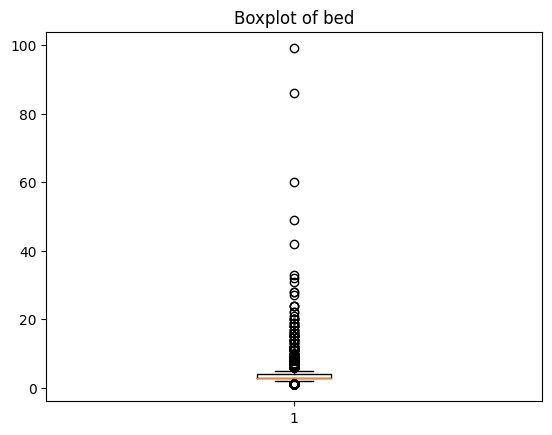

bath


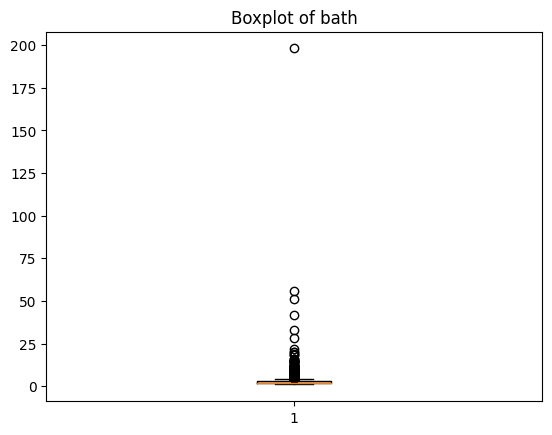

acre_lot


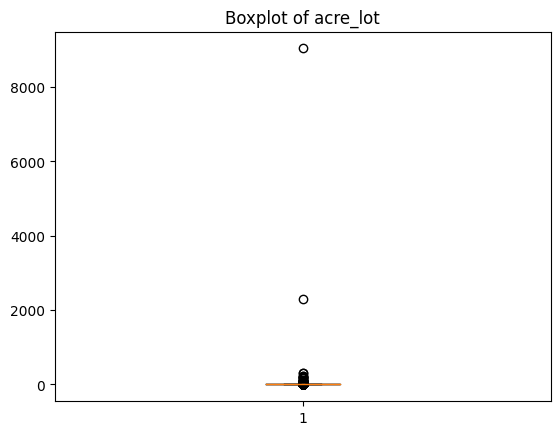

city
state
zip_code


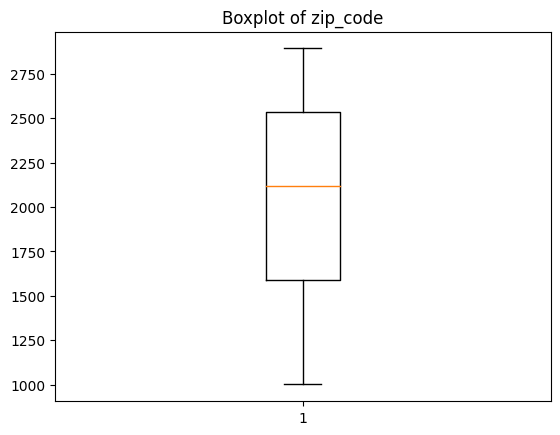

house_size


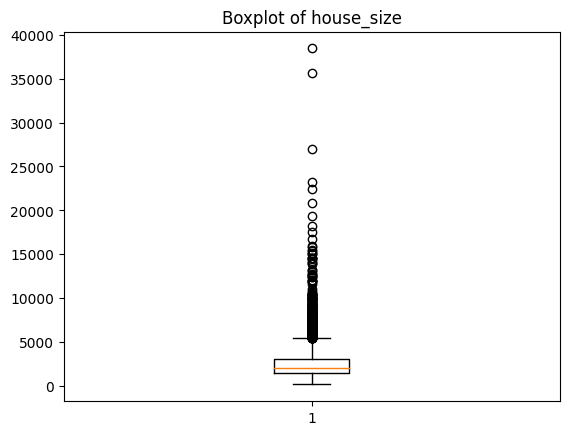

price


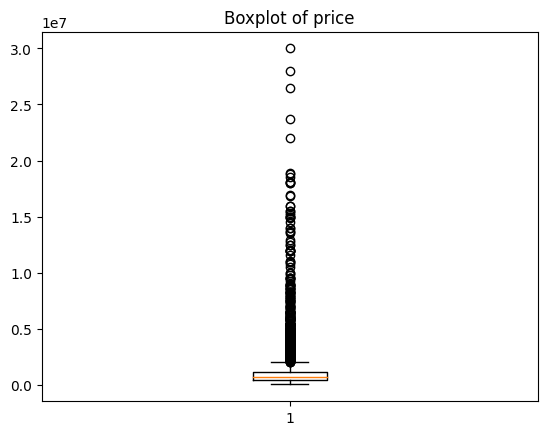

crime_index


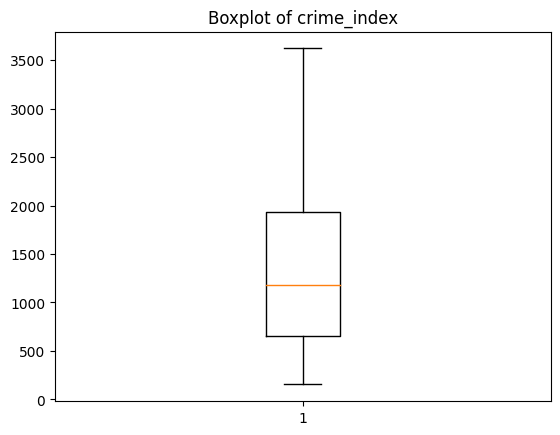

People_in_poverty


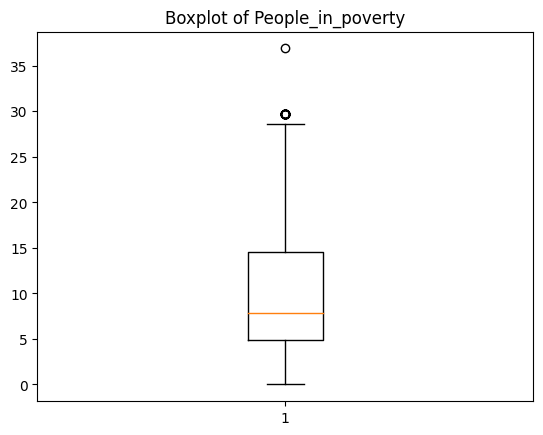

People_commute_time


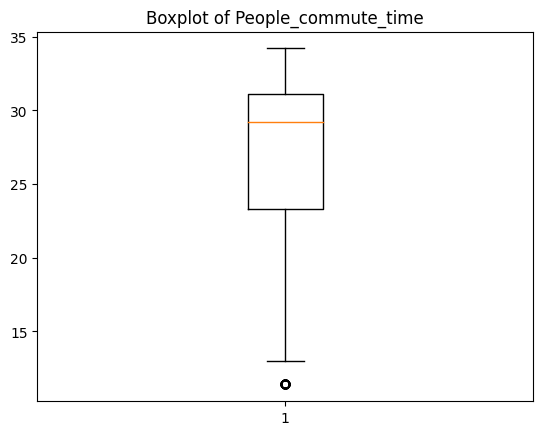

School_rating


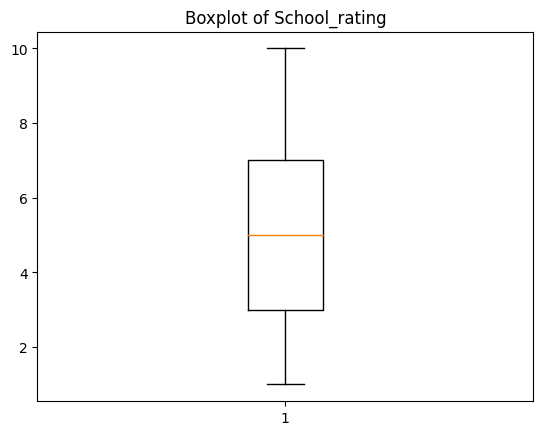

Personal_property_tax_rate


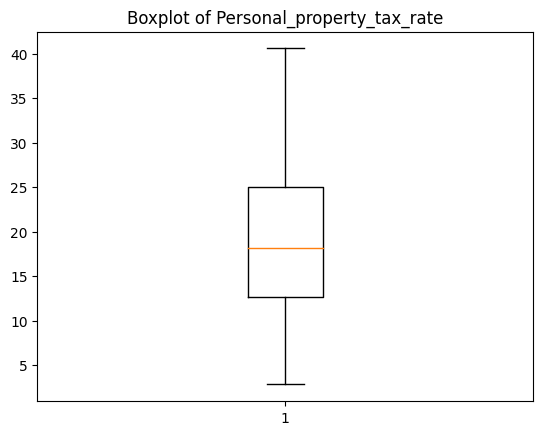

Population_density_per_city (population/sq mi)


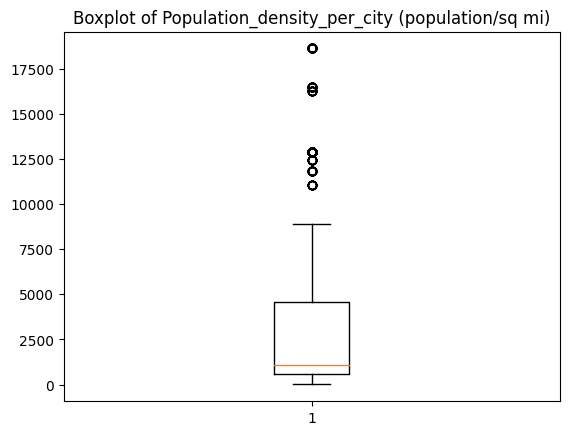

Average Education Index 


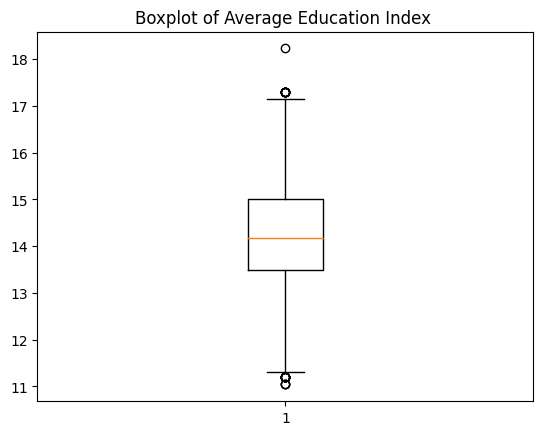

Median Household Income 


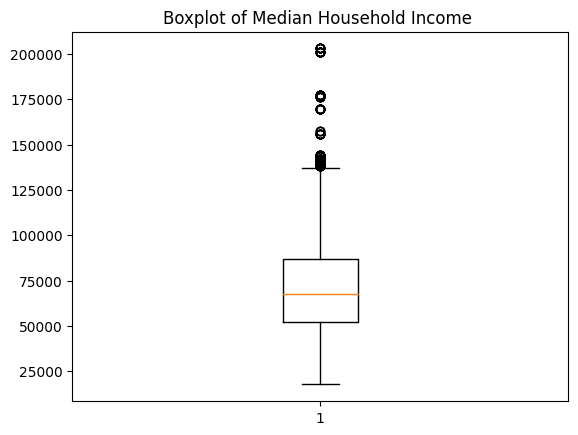

In [20]:


# Iterate through each column and create a boxplot
for column in data.columns:
    # plt.figure(figsize=(8, 6))  # Optional: Set the figure size (width, height)
    print(column)
    if column == 'city' or column == 'state':
      continue
    # Use the boxplot function with the current column
    plt.boxplot(data[column])

    # Add a title and labels to the plot
    plt.title(f'Boxplot of {column}')
    # plt.xlabel('Column Name')
    # plt.ylabel('Values')

    # Show the plot
    plt.show()

In [21]:
# Remove some outliers based on the box plot results
data = data[~(data['bed'] >= 7)]
data = data[~(data['bath'] >= 5)]
data = data[~(data['acre_lot'] >= 2)]
data = data[~(data['house_size'] >= 25000)]
data = data[~(data['People_in_poverty'] >= 35)]
data = data[~(data['Population_density_per_city (population/sq mi)'] >= 15000)]

print(data.shape)


(4677, 16)


In [22]:
# calculate skewness
from scipy import stats
from scipy.stats import skew
columns_to_skip = ['city', 'state']
skewness = data.loc[:, ~data.columns.isin(columns_to_skip)].apply(lambda x: skew(x)).sort_values(ascending=False)
skewness = skewness[abs(skewness) > 0.5]
print("There are {} numerical features with absolute Skew > 0.5 :".format(skewness.shape[0]))
skewness = pd.DataFrame({'Skew' :skewness})
skewness.head(10)

There are 8 numerical features with absolute Skew > 0.5 :


,Skew
price,4.383522
Population_density_per_city (population/sq mi),1.736310
acre_lot,1.623740
Median Household Income,0.984356
house_size,0.976969
People_in_poverty,0.959409
crime_index,0.692827
People_commute_time,-0.890407


In [23]:
# Box-Cox transformation
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
for i in skewness.index.tolist():
  data[i] = boxcox1p(data[i], boxcox_normmax(data[i] + 1))

In [24]:
# Verify skewness
columns_to_skip = ['city', 'state']
skewness = data.loc[:, ~data.columns.isin(columns_to_skip)].apply(lambda x: skew(x)).sort_values(ascending=False)
skewness = skewness[abs(skewness) > 0.5]
print("There are {} numerical features with absolute Skew > 0.5 :".format(skewness.shape[0]))
skewness = pd.DataFrame({'Skew' :skewness})
skewness.head(5)
print(data.shape)
print(type(data))

There are 0 numerical features with absolute Skew > 0.5 :
(4677, 16)
<class 'pandas.core.frame.DataFrame'>


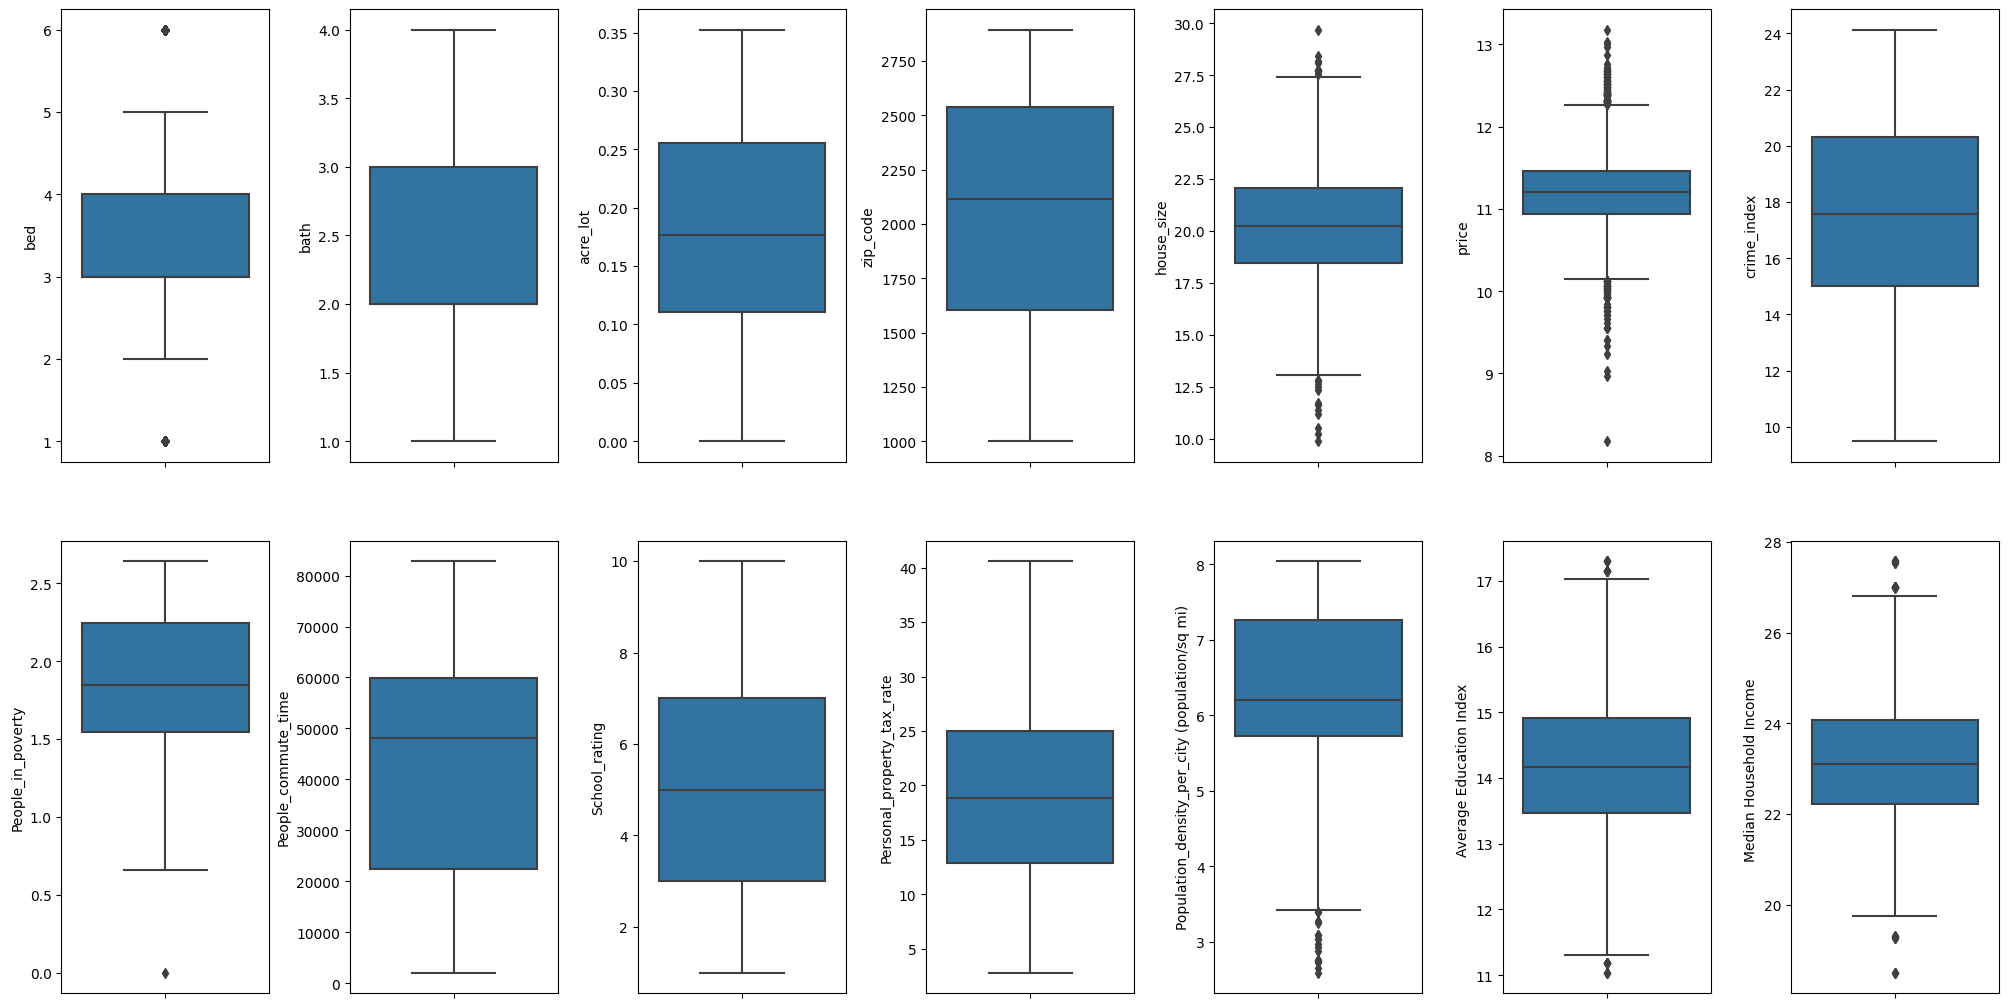

In [25]:
# Outlier Verificaton
data1 = data.drop('state', axis =1)
data2 = data1.drop('city', axis = 1)

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in data2.items():
    sns.boxplot(y=k, data=data2, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

<ipython-input-26-fc835da15076>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


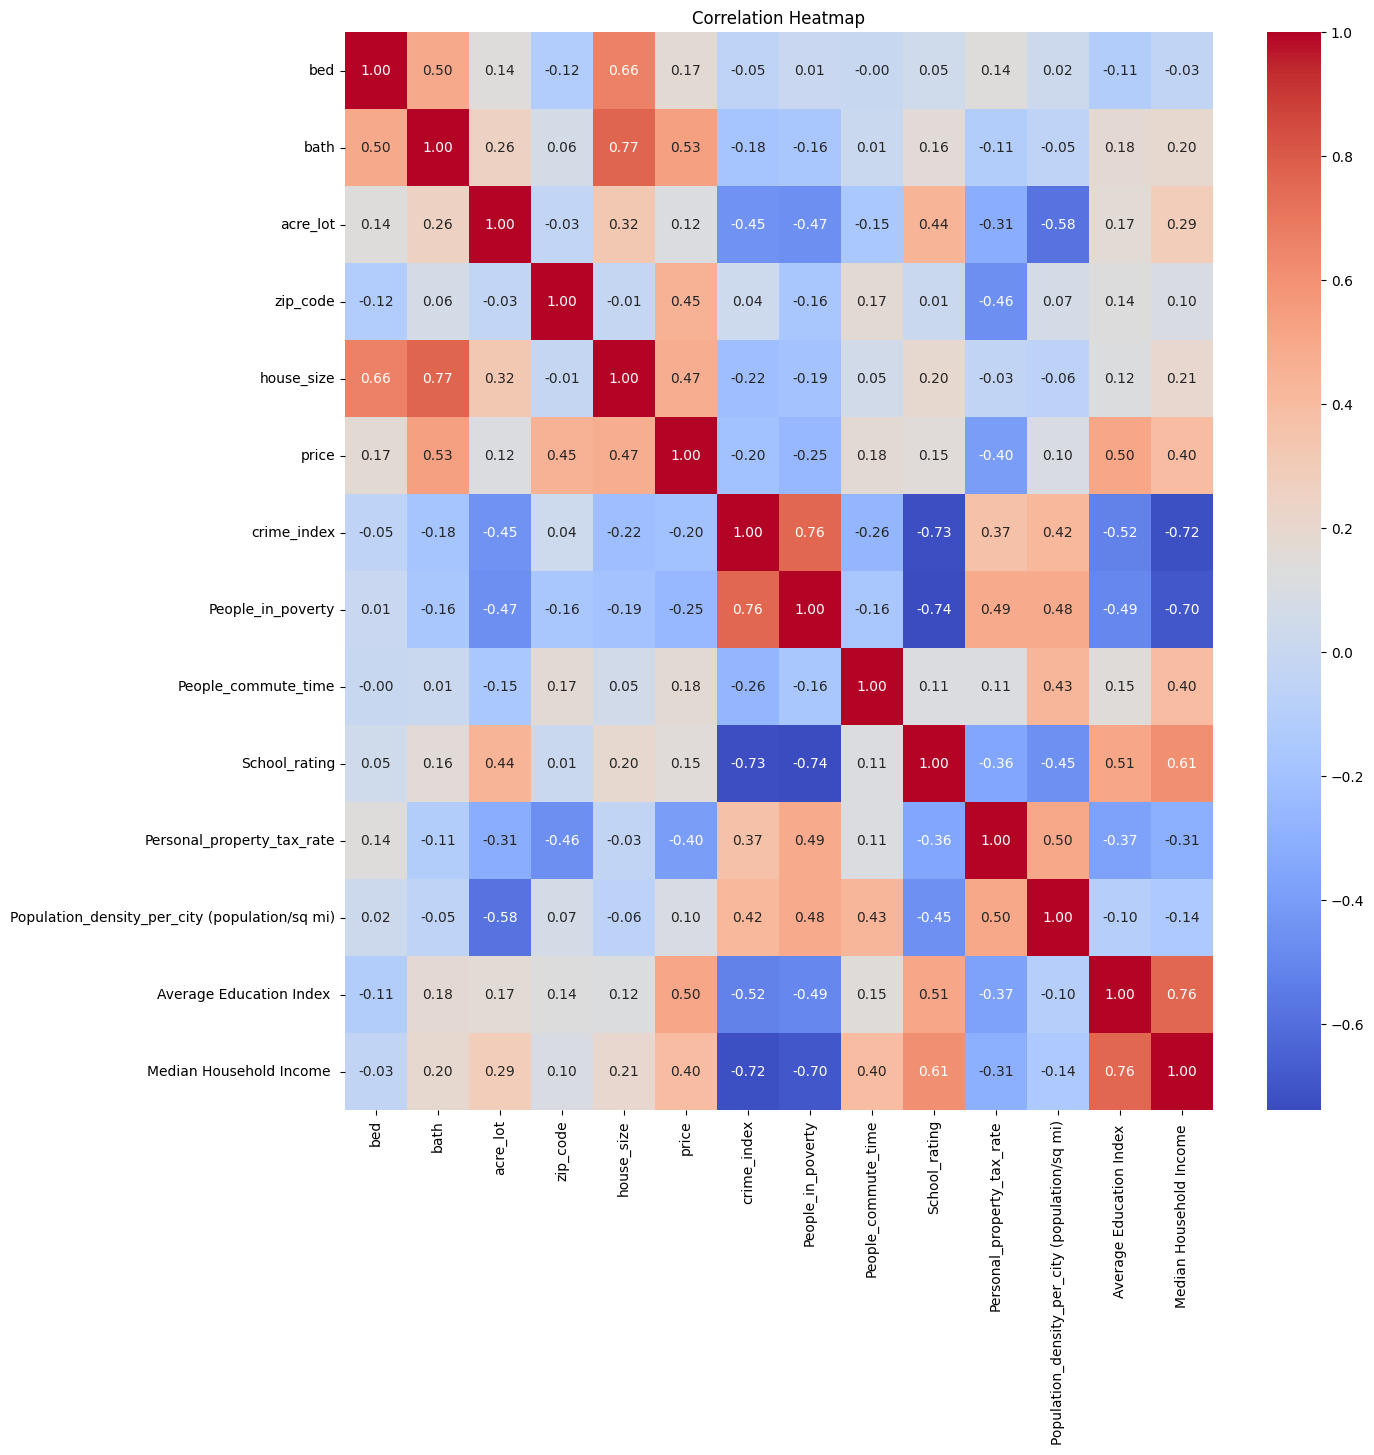

In [26]:
# Create a correlation matrix
correlation_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(14, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Show the plot
plt.title('Correlation Heatmap')
plt.show()

In [27]:
# =====================Below are Models====================

In [28]:
# Seperate X_data and y_data from the dataset
y_data = data['price']

data.drop(['price'], axis = 1, inplace=True)
data.drop(['city'], axis = 1, inplace=True)
data.drop(['state'], axis = 1, inplace=True)

X_data = data
print(X_data.info)


<bound method DataFrame.info of         bed  bath  acre_lot  zip_code  house_size  crime_index  \
0       3.0   2.0  0.144134    2351.0   19.307562    17.215170   
3       3.0   2.0  0.184398    2351.0   19.445091    17.215170   
4       3.0   2.0  0.235004    2351.0   20.596014    17.215170   
5       4.0   3.0  0.270320    2351.0   22.456726    17.215170   
6       3.0   2.0  0.167818    2351.0   20.377908    17.215170   
...     ...   ...       ...       ...         ...          ...   
102638  4.0   3.0  0.180431    2675.0   21.490644    20.308085   
102639  3.0   3.0  0.237513    2675.0   24.270916    20.308085   
102640  3.0   2.0  0.237513    2675.0   21.710606    20.308085   
102641  3.0   2.0  0.202631    2675.0   20.140535    20.308085   
102643  3.0   2.0  0.180431    2675.0   17.960921    20.308085   

        People_in_poverty  People_commute_time  School_rating  \
0                1.372568         75603.352770              5   
3                1.372568         75603.35277

In [29]:
# Normalize data
from sklearn.preprocessing import MinMaxScaler
import numpy as np
# Normalize columns in X_data, except 'zip_code' column
columns_to_normalize = X_data.columns[X_data.columns != 'zip_code']
zip_code_column = X_data['zip_code']

scaler = MinMaxScaler()
X_data[columns_to_normalize] = scaler.fit_transform(X_data[columns_to_normalize])
X_data['zip_code'] = zip_code_column
#Normalize y_data
y_data = np.array(y_data)
y_data = y_data.reshape(-1,1)
y_data = scaler.fit_transform(y_data)
print(X_data.shape)
print(y_data)

(4677, 13)
[[0.58957652]
 [0.56773261]
 [0.61962953]
 ...
 [0.63952075]
 [0.60816498]
 [0.5823992 ]]


In [30]:

#Create dummy variables for the zip_code
data_zip_dums=pd.get_dummies(X_data['zip_code'])
data11=X_data.drop(["zip_code"],axis=1)
X_data=pd.concat([data11,data_zip_dums],axis=1)
print(X_data.shape)
print(y_data)


(4677, 458)
[[0.58957652]
 [0.56773261]
 [0.61962953]
 ...
 [0.63952075]
 [0.60816498]
 [0.5823992 ]]


Ridge Regression - R2 Score: 0.7655802781976135
Ridge Regression - MAE is: 0.03132969819810733
Ridge Regression - MSE is: 0.0019215236523715924
Ridge Regression - RMSE is: 0.04383518737694174


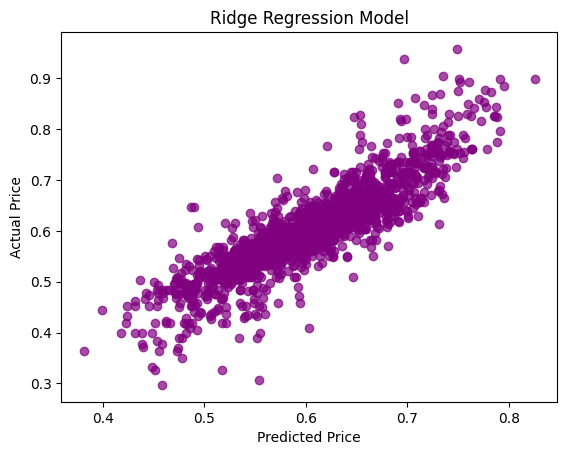

In [31]:
# Ridge Regression Model
from sklearn import linear_model
from sklearn.model_selection import train_test_split

ridge = linear_model.Ridge(alpha=10)
# Split the data into 67% training and 33% testing data
# X = data.drop(['price'], axis = 1)
# y = data['price']
X_data.columns = X_data.columns.astype(str)
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.33, random_state = 42)
# Train the model with our training data
ridge_model = ridge.fit(X_train, y_train)

# Plot Model Prediction
predictions = ridge_model.predict(X_test)
import matplotlib.pyplot as plt
plt.scatter(predictions, y_test, alpha = 0.7, color = 'purple') # alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Ridge Regression Model')
# check the model performance/ accuracy using Mean Squared Error(MSE) and sklearn.metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
from sklearn.metrics import r2_score
r2 = r2_score(y_test, predictions)
print('Ridge Regression - R2 Score:', r2)
print ('Ridge Regression - MAE is:', mean_absolute_error(y_test, predictions))
print ('Ridge Regression - MSE is:', mean_squared_error(y_test, predictions))
print ('Ridge Regression - RMSE is:', sqrt(mean_squared_error(y_test, predictions)))

Lasso Regression Model - R2 Score: 0.7909502513305242
Lasso Regression Model- MAE is: 0.029915581354297734
Lasso Regression Model - MSE is: 0.0017135675851085547
Lasso Regression Model- RMSE is: 0.04139526041841692


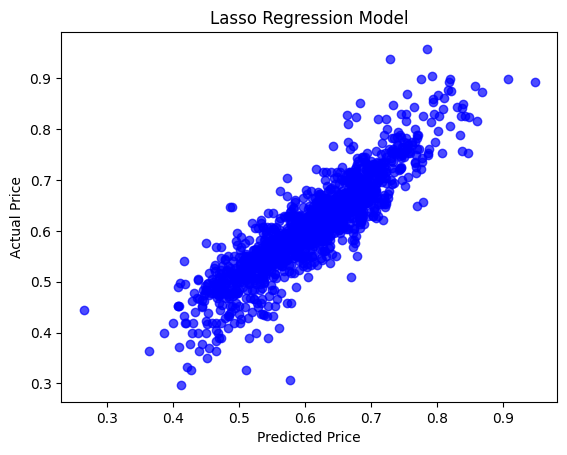

In [32]:
#Lasso Regression Model
from sklearn import linear_model
from sklearn.model_selection import train_test_split
lasso = linear_model.Lasso(alpha = 0.000006)
# Split the data into 67% training and 33% testing data
# X = data.drop(['price'], axis = 1)
# y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.33, random_state = 42)

# Train the model with our training data
lasso_model = lasso.fit(X_train, y_train)
# make predictions based on model
predictions = lasso_model.predict(X_test)
# Plot Model Prediction
import matplotlib.pyplot as plt
plt.scatter(predictions, y_test, alpha = 0.7, color = 'b') # alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Lasso Regression Model')
# check the model performance/ accuracy using Mean Squared Error(MSE) and sklearn.metrics
r2 = r2_score(y_test, predictions)
print('Lasso Regression Model - R2 Score:', r2)
print ('Lasso Regression Model- MAE is:', mean_absolute_error(y_test, predictions))
print ('Lasso Regression Model - MSE is:', mean_squared_error(y_test, predictions))
print ('Lasso Regression Model- RMSE is:', sqrt(mean_squared_error(y_test, predictions)))

<ipython-input-33-02c868313228>:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(X_train, y_train)


Random Forest - R2 Score: 0.7848947572314562
Random Forest - MAE is: 0.02933878038097487
Random Forest - MSE is: 0.0017632040877402083
Random Forest - RMSE is: 0.041990523785018545


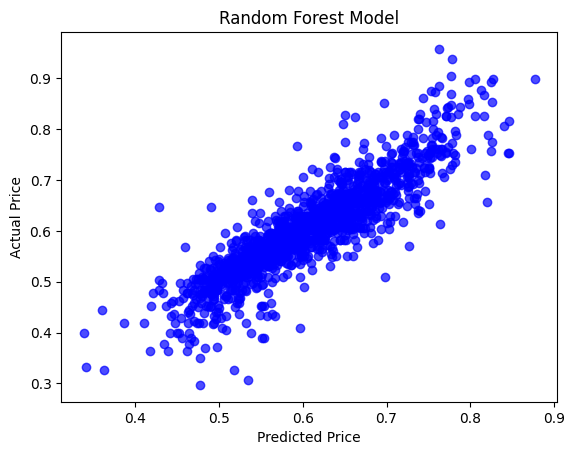

In [33]:
# Random Forest Module
from sklearn.ensemble import RandomForestRegressor

# Split the data into 67% training and 33% testing data
# X = data.drop(['price'], axis = 1)
# y = data['price']

# kept it consistent as Lingji
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33, random_state=42)

# Create a Random Forest regressor
# n_estimators=100 means that the Random Forest will consist of 100 decision trees.
# By setting random_state=42, I am ensuring that the random number generator is initialized with the same seed every time you run the code.
# This helps in obtaining consistent results when you execute the Random Forest algorithm.
random_forest = RandomForestRegressor(n_estimators=300, random_state=42)

# Train the Random Forest model
random_forest.fit(X_train, y_train)

# Make predictions on the testing set
predictions = random_forest.predict(X_test)

# Plotting Random forest model
plt.scatter(predictions, y_test, alpha = 0.7, color = 'b') # alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Random Forest Model')

# Evaluate the model using R2 score
r2 = r2_score(y_test, predictions)
print('Random Forest - R2 Score:', r2)
print('Random Forest - MAE is:', mean_absolute_error(y_test, predictions))
print('Random Forest - MSE is:', mean_squared_error(y_test, predictions))
print('Random Forest - RMSE is:', sqrt(mean_squared_error(y_test, predictions)))

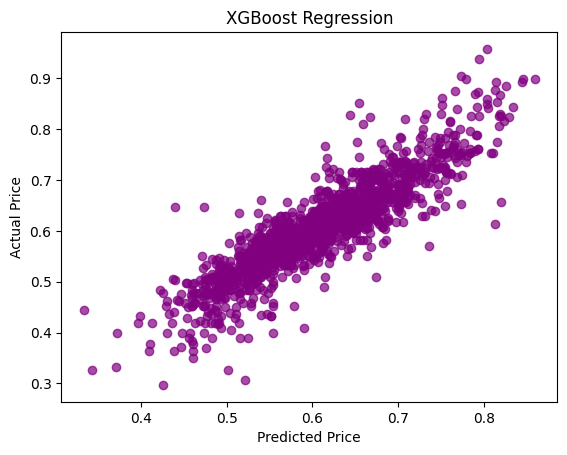

XGBoost Regression - R2 Score: 0.7966207887229624
XGBoost Regression - MAE is: 0.029004353318961583
XGBoost Regression - MSE is: 0.001667086548285157
XGBoost Regression- RMSE is: 0.04082997120113063


In [34]:

#XGBoost Regression
import xgboost as xgb

# Splitting the data into 67% training and 33% testing data which is same with the other model's setting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33, random_state=42)

# Create a Random Forest regressor
reg= xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.3,max_depth = 5, alpha = 0.4, n_estimators = 130)
# Train the XGBoost Regression
xgboost_model=reg.fit(X_train,y_train)
# Make predictions on the testing set
predictions = xgboost_model.predict(X_test)

# Plotting Random forest model which is the same with the other model's setting
import matplotlib.pyplot as plt
plt.scatter(predictions, y_test, alpha = 0.7, color = 'purple')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('XGBoost Regression')
plt.show()

# check the model performance/ accuracy using Mean Squared Error(MSE) and sklearn.metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
from sklearn.metrics import r2_score
r2 = r2_score(y_test, predictions)
print('XGBoost Regression - R2 Score:', r2)
print('XGBoost Regression - MAE is:', mean_absolute_error(y_test, predictions))
print('XGBoost Regression - MSE is:', mean_squared_error(y_test, predictions))
print('XGBoost Regression- RMSE is:', sqrt(mean_squared_error(y_test, predictions)))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Epoch 1/100
375/375 [==============================] - 5s 5ms/step - loss: 0.0123 - val_loss: 0.0025
Epoch 2/100
375/375 [==============================] - 2s 6ms/step - loss: 0.0027 - val_loss: 0.0025
Epoch 3/100
375/375 [==============================] - 1s 4ms/step - loss: 0.0029 - val_loss: 0.0029
Epoch 4/100
375/375 [==============================] - 1s 4ms/step - loss: 0.0027 - val_loss: 0.0023
Epoch 5/100
375/375 [==============================] - 1s 3ms/step - loss: 0.0027 - val_loss: 0.0021
Epoch 6/100
375/375 [==============================] - 2s 4ms/step - loss: 0.0025 - val_loss: 0.0024
Epoch 7/100
375/375 [==============================] - 2s 6ms/step - loss: 0.0025 - val_loss: 0.0022
Epoch 8/100
375/375 [==============================] - 4s 11ms/step - loss: 0.0024 - val_loss: 0.0025
Epoch 9/100
375/375 [==============================] - 3s 7ms/step - loss: 0.0024 - val_loss: 0.0023
Epoch 10/100
375/375 [==============================] - 3s 7ms/step - loss: 0.0023 - val_l

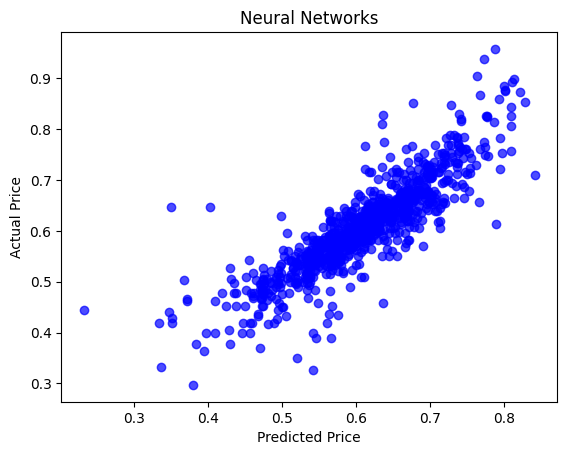

In [35]:
# Neural Networks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn import preprocessing
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt
import matplotlib.pyplot as plt

X_train, X_test,y_train,y_test= train_test_split(X_data, y_data,test_size=0.2,random_state=42)

# Perform feature selection
k_features = 20  # Choose the number of top features you want to select
selector = SelectKBest(score_func=f_regression, k=k_features)
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Build the neural network model
neural_network = Sequential()
neural_network.add(Dense(128, activation='relu', input_shape=(X_train_selected.shape[1],)))
neural_network.add(Dense(64, activation='relu'))
neural_network.add(Dense(64,activation='relu'))
neural_network.add(Dense(64,activation='relu'))
neural_network.add(Dense(64,activation='relu'))
neural_network.add(Dense(64,activation='relu'))
neural_network.add(Dense(64,activation='relu'))
neural_network.add(Dense(64,activation='relu'))
neural_network.add(Dense(64,activation='relu'))
neural_network.add(Dense(64,activation='relu'))
neural_network.add(Dense(64,activation='relu'))
neural_network.add(Dense(64,activation='relu'))
neural_network.add(Dense(1))

# Compile the model
neural_network.compile(optimizer='adam', loss='mean_squared_error')

# Train the model with selected features
neural_network.fit(x=X_train_selected, y=y_train,
          validation_data=(X_test_selected, y_test),
          batch_size=10, epochs=100)

# Predict using the selected features
predictions_NN = neural_network.predict(X_test_selected)

# Evaluate the model using R2 score
r2 = r2_score(y_test, predictions_NN)
print('NN - R2 Score:', r2)
print('NN - MAE is:', mean_absolute_error(y_test, predictions_NN))
print('NN - MSE is:', mean_squared_error(y_test, predictions_NN))
print('NN - RMSE is:', sqrt(mean_squared_error(y_test, predictions_NN)))

# Plotting the predicted vs. actual prices
plt.scatter(predictions_NN, y_test, alpha=0.7, color='b')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Neural Networks')
plt.show()


In [36]:
'''Models Comparison:<br>
Lasso Regression Model - R2 Score: 0.7909502513305242
Lasso Regression Model- MAE is: 0.029915581354297734
Lasso Regression Model - MSE is: 0.0017135675851085547
Lasso Regression Model- RMSE is: 0.04139526041841692

Ridge Regression - R2 Score: 0.7655802781976135
Ridge Regression - MAE is: 0.03132969819810733
Ridge Regression - MSE is: 0.0019215236523715924
Ridge Regression - RMSE is: 0.04383518737694174

Random Forest - R2 Score: 0.7848947572314562<br>
Random Forest - MAE is: 0.02933878038097487<br>
Random Forest - MSE is: 0.0017632040877402083<br>
Random Forest - RMSE is: 0.041990523785018545<br>

XGBoost Regression - R2 Score: 0.7966207887229624<br>
XGBoost Regression - MAE is: 0.029004353318961583<br>
XGBoost Regression - MSE is: 0.001667086548285157<br>
XGBoost Regression- RMSE is: 0.04082997120113063<br>
NN-Epoch=100<br>
NN - R2 Score: 0.686947477079686
NN - MAE is: 0.03463102560369906
NN - MSE is: 0.0025651693631147986
NN - RMSE is: 0.05064750105498591

'''

'Models Comparison:<br>\nLasso Regression Model - R2 Score: 0.7909502513305242\nLasso Regression Model- MAE is: 0.029915581354297734\nLasso Regression Model - MSE is: 0.0017135675851085547\nLasso Regression Model- RMSE is: 0.04139526041841692\n\nRidge Regression - R2 Score: 0.7655802781976135\nRidge Regression - MAE is: 0.03132969819810733\nRidge Regression - MSE is: 0.0019215236523715924\nRidge Regression - RMSE is: 0.04383518737694174\n\nRandom Forest - R2 Score: 0.7848947572314562<br>\nRandom Forest - MAE is: 0.02933878038097487<br>\nRandom Forest - MSE is: 0.0017632040877402083<br>\nRandom Forest - RMSE is: 0.041990523785018545<br>\n\nXGBoost Regression - R2 Score: 0.7966207887229624<br>\nXGBoost Regression - MAE is: 0.029004353318961583<br>\nXGBoost Regression - MSE is: 0.001667086548285157<br>\nXGBoost Regression- RMSE is: 0.04082997120113063<br>\nNN-Epoch=100<br>\nNN - R2 Score: 0.686947477079686\nNN - MAE is: 0.03463102560369906\nNN - MSE is: 0.0025651693631147986\nNN - RMSE is

Models Comparison:<br>
Ridge Regression - R2 Score: 0.7655802781976135<br>
Ridge Regression - MAE is: 0.03132969819810733<br>
Ridge Regression - MSE is: 0.0019215236523715924<br>
Ridge Regression - RMSE is: 0.04383518737694174<br>
Lasso Regression Model - R2 Score: 0.7909502513305242<br>
Lasso Regression Model- MAE is: 0.029915581354297734<br>
Lasso Regression Model - MSE is: 0.0017135675851085547<br>
Lasso Regression Model- RMSE is: 0.04139526041841692<br>

Random Forest - R2 Score: 0.7848947572314562<br>
Random Forest - MAE is: 0.02933878038097487<br>
Random Forest - MSE is: 0.0017632040877402083<br>
Random Forest - RMSE is: 0.041990523785018545<br>
XGBoost Regression - R2 Score: 0.7966207887229624<br>
XGBoost Regression - MAE is: 0.029004353318961583<br>
XGBoost Regression - MSE is: 0.001667086548285157<br>
XGBoost Regression- RMSE is: 0.04082997120113063<br>
NN-Epoch=100<br>
NN - R2 Score: 0.686947477079686<br>
NN - MAE is: 0.03463102560369906<br>
NN - MSE is: 0.0025651693631147986<br>
NN - RMSE is: 0.05064750105498591<br>
